<div class="alert alert-block alert-danger">
    
<b>Euroleague 2020-2021 Season (Stats by Player)</b> 

Examination of the relationship between height and 3-point attempts
    
</div>

<div class="alert alert-block alert-success">
    
<b>Tall players are known to make far fewer three-point attempts than other players. Is this about the game position assigned to the players, about playing near the basket, or is there a negative correlation between height and 3-pointers? In this regard, the data of the Euroleague 2020-2021 season will be analyzed and the relationship between height and 3-point attempts will be examined.</b> 
    
</div>

There are three positions in basketball that are designated for long-range shooting: point guard, shooting guard and small forward. The players that are assigned to these positions are usually strong three-point shooters and plays are made in order for these players to execute that big shot.

That leaves two positions on a team: power forward and center. The players that are assigned to these positions are usually the tallest players on the court and use their size to play the short-range game.

Because these players are generally playing close to the basket, it is extremely rare to see one who can execute a three-point shot with the ease of a guard or small forward.

The data about the positions of the players are taken from the Euroleague official website. For the analysis, three positions will be used that taken from the Euroleague official website.
- Guard
- Forward
- Center

## ***Analysis Content***

1.  3-point attempts in general (regardless of players' positions)
2.  Examination of the relationship between height and 3-point attempts (Creating height groups)
3.  Checking for outliers
4.  Three-point field goal percentages (success rates)
5.  Examination of the relationship between height and 3-point attempts according to positions
6.  Checking for outliers
7.  Three-point field goal percentages (success rates)
8.  Result

<div class="alert alert-block alert-danger">
    
<b>checking the dataset informations and creating a new dataframe with related columns</b> 
    
</div>

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for Style
from colorama import Fore
from colorama import Style

import scipy.stats as stats

import warnings;
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
el = pd.read_excel('Euroleague 2020-2021(WholeSeason).xlsx')
el

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,2FG,3FG,FT,Rebounds(O),Rebounds(D),Rebounds(T),Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR
0,"Abalde, Alberto",Real Madrid,6,Forward,Spain,25,202,39,761,281,47/100,50/115,37/44,11,93,104,91,21,38,0,6,60,57,325
1,"Abrines, Alex",FC Barcelona,21,Forward,Spain,27,198,39,730,237,22/50,55/130,28/31,22,50,72,26,22,13,8,7,96,39,182
2,"Alocen, Carlos",Real Madrid,12,Guard,Spain,20,194,28,376,110,35/68,11/39,7/12,3,35,38,63,6,41,2,4,46,31,93
3,"Amaize, Robin",FC Bayern Munich,15,Forward,Germany,26,188,9,51,4,2/5,0/3,0/0,3,1,4,1,2,1,0,1,6,2,-1
4,"Anderson, James",Anadolu Efes,23,Forward,USA,31,198,41,622,172,34/63,23/51,35/49,30,83,113,31,18,16,6,3,55,39,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,3,Guard,Russian Federation,27,192,17,82,15,2/6,1/11,8/12,3,4,7,15,5,11,1,0,20,12,6
290,"Zipser, Paul",FC Bayern Munich,16,Forward,Germany,26,203,39,858,356,55/95,60/137,66/82,23,93,116,42,26,29,10,5,86,74,371
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,23,Center,Croatia,23,210,34,676,309,136/231,0/0,37/48,73,109,182,23,14,47,26,17,56,58,386
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,50,Guard,Poland,22,200,11,150,29,3/12,7/18,2/2,3,14,17,7,6,5,0,1,22,7,18


In [3]:
el[el.Player.duplicated(keep=False)==True]

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,2FG,3FG,FT,Rebounds(O),Rebounds(D),Rebounds(T),Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR
282,"Westermann, Leo",Fenerbahce Beko Istanbul,2,Guard,France,28,198,9,114,43,7/16,9/20,2/2,1,14,15,21,5,19,0,1,18,10,36
283,"Westermann, Leo",FC Barcelona,2,Guard,France,28,198,15,166,41,5/11,8/26,7/9,2,19,21,27,5,9,0,1,26,11,43


***There are two rows belonging to Leo Westermann since he played for two teams in the 2020-2021 season. We won't analyze the teams, so let's combine his information.***

In [4]:
el.loc[283, 'Games':'PIR'] = [24,280,84,'12/27','17/46','9/11',3,33,36,48,10,28,0,2,44,21,79]

# PIR calculator was used to find PIR

In [5]:
el.drop(index = [282], inplace = True)

In [6]:
el.reset_index(drop = True, inplace = True)

In [7]:
el.tail(15)

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,2FG,3FG,FT,Rebounds(O),Rebounds(D),Rebounds(T),Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR
278,"Walden, Corey",Crvena Zvezda Mts Belgrade,2,Guard,USA,28,188,30,701,314,54/117,41/105,83/99,10,43,53,69,27,56,3,11,87,129,298
279,"Walkup, Thomas",Zalgiris Kaunas,0,Guard,USA,28,193,34,822,280,61/130,43/116,29/32,18,84,102,153,36,54,0,10,80,79,361
280,"Walton Jr, Derrick",LDLC ASVEL Villeurbanne,14,Guard,USA,25,185,8,158,49,7/24,6/17,17/22,0,8,8,18,5,17,0,2,13,26,41
281,"Weiler-Babb, Nick",FC Bayern Munich,0,Guard,USA,25,196,33,780,208,33/93,32/94,46/57,29,78,107,74,41,40,8,11,81,61,234
282,"Westermann, Leo",FC Barcelona,2,Guard,France,28,198,24,280,84,12/27,17/46,9/11,3,33,36,48,10,28,0,2,44,21,79
283,"White, Aaron",Panathinaikos Opap Athens,30,Forward,USA,28,206,33,739,241,55/90,27/74,50/62,44,89,133,32,16,24,6,7,62,56,297
284,"Wilbekin, Scottie",Maccabi Playtika Tel Aviv,1,Guard,USA,27,188,34,920,470,70/141,80/244,90/101,9,75,84,132,37,82,1,10,49,126,463
285,"Williams, Derrick",Valencia Basket,21,Forward,USA,29,203,34,688,306,88/133,23/71,61/83,16,88,104,36,23,35,5,7,52,64,329
286,"Yabusele, Guerschon",LDLC ASVEL Villeurbanne,28,Forward,France,25,204,30,754,329,75/142,43/112,50/70,30,96,126,35,23,47,18,9,65,75,329
287,"Zaitcev, Viacheslav",Khimki Moscow Region,8,Guard,Russian Federation,31,190,34,663,175,53/104,13/40,30/37,13,69,82,83,45,56,14,13,84,58,219


### ***splitting 3FG Column into two parts (the three-point field goals made and three-point field goals attempted), adding new column (the three-point field goals percentage)***

<span style="color:purple">3PM :  3-Point Field Goals Made</span>

<span style="color:purple">3PA :  3-Point Field Goals Attempted</span>

<span style="color:purple">3P% :  3-Point Field Goals Percentage (Success Rate)</span>

In [8]:
el[['3PM', '3PA']] = el['3FG'].str.split('/', expand=True).astype('int64')

In [9]:
el['3P%'] = (el['3PM'] / el['3PA'])*100

In [10]:
# Since the game duration varies for each player, even per game, 
# we need to calculate 3-point attempts per minute.

el['3PA/Min'] = el['3PA'] / el['Min']

In [11]:
el.isnull().sum().sum()

34

In [12]:
# we have some NaN values because of zero attempts

el[el['3P%'].isnull()][['3FG', '3P%']].sample(3)

,3FG,3P%
160,0/0,NaN
261,0/0,NaN
132,0/0,NaN


In [13]:
el.fillna(0, inplace=True)

In [14]:
el.columns

Index(['Player', 'Club', 'Number', 'Position', 'Nation', 'Age', 'Height',
       'Games', 'Min', 'Pts', '2FG', '3FG', 'FT', 'Rebounds(O)', 'Rebounds(D)',
       'Rebounds(T)', 'Assists', 'Steals', 'Turnovers', 'Blocks(Fv)',
       'Blocks(Ag)', 'Fouls(Cm)', 'Fouls(Rv)', 'PIR', '3PM', '3PA', '3P%',
       '3PA/Min'],
      dtype='object')

### ***creating a new dataframe with related columns***

<div><span style="color:purple"><b>Since we don't need a player-based success ranking and the number of players in the dataset is limited, I will ignore criteria such as the number of matches and high game time. I will use the information of players who have played over 10 minutes.</b></span></div>

In [15]:
el[el.Min < 11]

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,2FG,3FG,FT,Rebounds(O),Rebounds(D),Rebounds(T),Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag),Fouls(Cm),Fouls(Rv),PIR,3PM,3PA,3P%,3PA/Min
6,"Atias, Yonatan",Maccabi Playtika Tel Aviv,25,Center,Israel,19,205,2,6,0,0/2,0/0,0/0,0,2,2,0,0,1,0,0,0,0,-1,0,0,0.000,0.000
8,"Badji, Ibou",FC Barcelona,17,Center,Senegal,18,215,3,6,0,0/1,0/0,0/0,0,0,0,0,0,0,0,0,1,0,-2,0,0,0.000,0.000
28,"Brenneke, Lorenz",Alba Berlin,11,Forward,Germany,20,204,1,10,0,0/1,0/0,0/0,0,1,1,0,0,0,0,0,1,2,1,0,0,0.000,0.000
73,"Ferrando, Guillem",Valencia Basket,45,Guard,Spain,18,185,1,2,0,0/0,0/1,0/0,0,2,2,1,0,0,0,0,0,0,2,0,1,0.000,0.500
85,"George, Jason",FC Bayern Munich,1,Guard,Germany,19,198,2,3,0,0/0,0/0,0/0,0,0,0,0,0,0,0,0,1,0,-1,0,0,0.000,0.000
122,"Kadoshnikov, Dmitrii",Khimki Moscow Region,10,Forward,Russian Federation,19,202,5,10,4,2/4,0/0,0/0,1,0,1,0,0,0,0,1,2,0,0,0,0,0.000,0.000
130,"Koniaris, Antonios",Olympiacos Piraeus,6,Guard,Greece,23,196,1,6,0,0/0,0/0,0/0,0,0,0,0,1,1,0,0,1,0,-1,0,0,0.000,0.000
152,"Lopatin, Andrei",CSKA Moscow,28,Forward,Russia,22,208,2,7,0,0/0,0/1,0/0,1,1,2,0,0,2,0,0,0,0,-1,0,1,0.000,0.143
176,"Moretti, Davide",AX Armani Exchange Milan,3,Guard,Italy,22,189,3,6,2,0/0,0/1,2/2,0,0,0,0,0,1,0,0,1,3,2,0,1,0.000,0.167
179,"Ndjock, Elwin",LDLC ASVEL Villeurbanne,11,Forward,France,19,193,2,9,1,0/0,0/0,1/2,0,1,1,0,0,1,0,0,5,1,-4,0,0,0.000,0.000


In [16]:
df = el[el.Min > 10][['Player','Club','Position','Nation','Age','Height','Games','Min','Pts',
                      '3PM','3PA','3P%','3PA/Min']]

In [17]:
df

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min
0,"Abalde, Alberto",Real Madrid,Forward,Spain,25,202,39,761,281,50,115,43.478,0.151
1,"Abrines, Alex",FC Barcelona,Forward,Spain,27,198,39,730,237,55,130,42.308,0.178
2,"Alocen, Carlos",Real Madrid,Guard,Spain,20,194,28,376,110,11,39,28.205,0.104
3,"Amaize, Robin",FC Bayern Munich,Forward,Germany,26,188,9,51,4,0,3,0.000,0.059
4,"Anderson, James",Anadolu Efes,Forward,USA,31,198,41,622,172,23,51,45.098,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,"Zakharov, Denis",Zenit St Petersburg,Guard,Russian Federation,27,192,17,82,15,1,11,9.091,0.134
289,"Zipser, Paul",FC Bayern Munich,Forward,Germany,26,203,39,858,356,60,137,43.796,0.160
290,"Zizic, Ante",Maccabi Playtika Tel Aviv,Center,Croatia,23,210,34,676,309,0,0,0.000,0.000
291,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,Guard,Poland,22,200,11,150,29,7,18,38.889,0.120


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 292
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    279 non-null    object 
 1   Club      279 non-null    object 
 2   Position  279 non-null    object 
 3   Nation    279 non-null    object 
 4   Age       279 non-null    int64  
 5   Height    279 non-null    int64  
 6   Games     279 non-null    int64  
 7   Min       279 non-null    int64  
 8   Pts       279 non-null    int64  
 9   3PM       279 non-null    int64  
 10  3PA       279 non-null    int64  
 11  3P%       279 non-null    float64
 12  3PA/Min   279 non-null    float64
dtypes: float64(2), int64(7), object(4)
memory usage: 30.5+ KB


In [19]:
df.shape

(279, 13)

In [20]:
df.size

3627

In [21]:
df.isnull().sum().sum()

0

In [22]:
df.describe()

,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min
count,279.000,279.000,279.000,279.000,279.000,279.000,279.000,279.000,279.000
mean,27.961,199.756,25.254,474.430,186.588,21.190,55.993,31.595,0.110
std,4.325,8.218,10.566,295.658,145.226,21.281,53.950,16.140,0.070
min,17.000,178.000,2.000,12.000,0.000,0.000,0.000,0.000,0.000
25%,25.000,193.000,16.000,213.000,59.000,3.000,8.000,27.896,0.064
50%,28.000,201.000,28.000,492.000,163.000,16.000,44.000,35.714,0.108
75%,31.000,205.000,33.000,727.000,283.500,34.000,92.500,41.230,0.152
max,40.000,223.000,41.000,1200.000,668.000,89.000,244.000,100.000,0.297


***

<div class="alert alert-block alert-danger">
    
<b>1. Analysis of 3-point attempts regardless of players' positions</b> 
   
</div>

<div class="alert alert-block alert-warning">

<b>general statistics of 3-point attempts</b>
    
</div>

In [23]:
df[['3PA', '3PA/Min']].describe().T

,count,mean,std,min,25%,50%,75%,max
3PA,279.000,55.993,53.950,0.000,8.000,44.000,92.500,244.000
3PA/Min,279.000,0.110,0.070,0.000,0.064,0.108,0.152,0.297


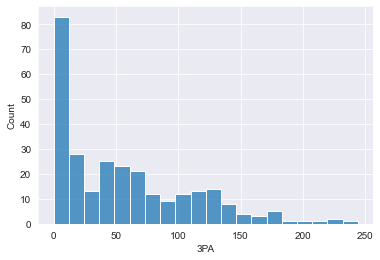

In [24]:
# all 3-point attempts throughout the entire season

sns.histplot(x='3PA', bins=20, data=df);

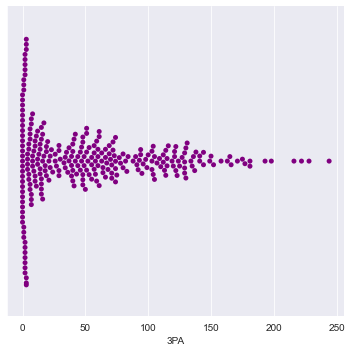

In [25]:
sns.catplot(x='3PA', data=df, kind='swarm', palette=['purple']);

<span style="color:blue"><b>we have many zero attempts</b></span>

In [26]:
# the number of players who did not attempt any 3-pointer

len(df[df['3PA'] == 0])

26

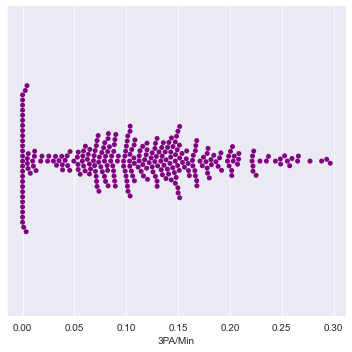

In [27]:
sns.catplot(x="3PA/Min", data=df, kind='swarm', palette=['purple']);

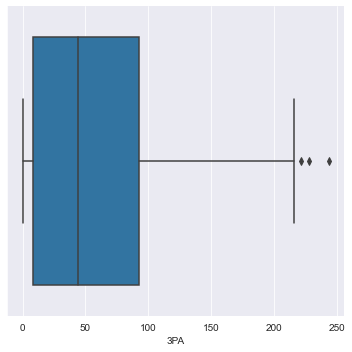

In [28]:
# 3-point attempts

sns.catplot(x="3PA", data=df, kind='box');

<span style="color:purple"><b>no outliers in the lower bound and there are only 3 outliers in the upper bound</b></span>

In [29]:
IQR = df['3PA'].quantile(0.75) - df['3PA'].quantile(0.25)
IQR

84.5

In [30]:
upper_lim = df['3PA'].quantile(0.75) + 1.5*IQR
upper_lim

219.25

In [31]:
# 3-Point Attempt Leaders (regardless of their game duration)

df[df['3PA'] > upper_lim]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min
143,"Larkin, Shane",Anadolu Efes,Guard,USA,28,182,35,1003,528,87,222,39.189,0.221
190,"Pangos, Kevin",Zenit St Petersburg,Guard,Slovenia,27,186,39,1130,528,89,228,39.035,0.202
284,"Wilbekin, Scottie",Maccabi Playtika Tel Aviv,Guard,USA,27,188,34,920,470,80,244,32.787,0.265


<span style="color:purple"><b>the outliers are players in guard position and below 1.90 meters</b></span>

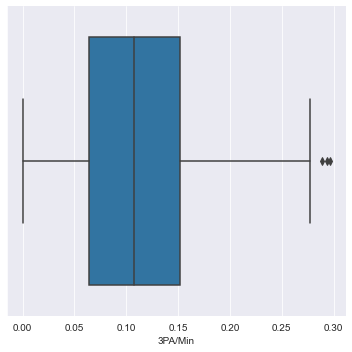

In [32]:
# 3-point attempts per minute

sns.catplot(x="3PA/Min", data=df, kind='box');

In [33]:
IQR = df['3PA/Min'].quantile(0.75) - df['3PA/Min'].quantile(0.25)
IQR

0.08760823896783942

In [34]:
upper_lim = df['3PA/Min'].quantile(0.75) + 1.5*IQR
upper_lim

0.28292750996691063

In [35]:
# # 3-Point Attempt Leaders (per minute) 

df[df['3PA/Min'] > upper_lim]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min
72,"Fernandez, Rudy",Real Madrid,Forward,Spain,35,196,28,433,155,44,127,34.646,0.293
155,"Lukosiunas, Karolis",Zalgiris Kaunas,Forward,Lithuania,23,195,16,91,36,11,27,40.741,0.297
234,"Shved, Alexey",Khimki Moscow Region,Guard,Russian Federation,32,198,23,749,455,72,216,33.333,0.288


<span style="color:purple"><b>the outliers are power forwards and a guard and below two meters</b></span>

<div class="alert alert-block alert-warning">

<b>***correlations (relationships)***</b>
    
</div>

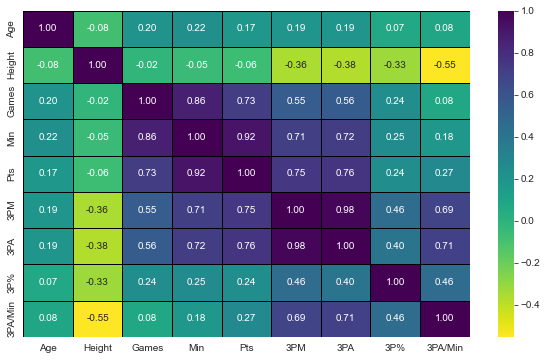

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', cmap='viridis_r', linewidth=1, linecolor='black');

<span style="color:purple"><b>There is a negative correlation (relationship) between height and 3FG related columns/values.</b></span>

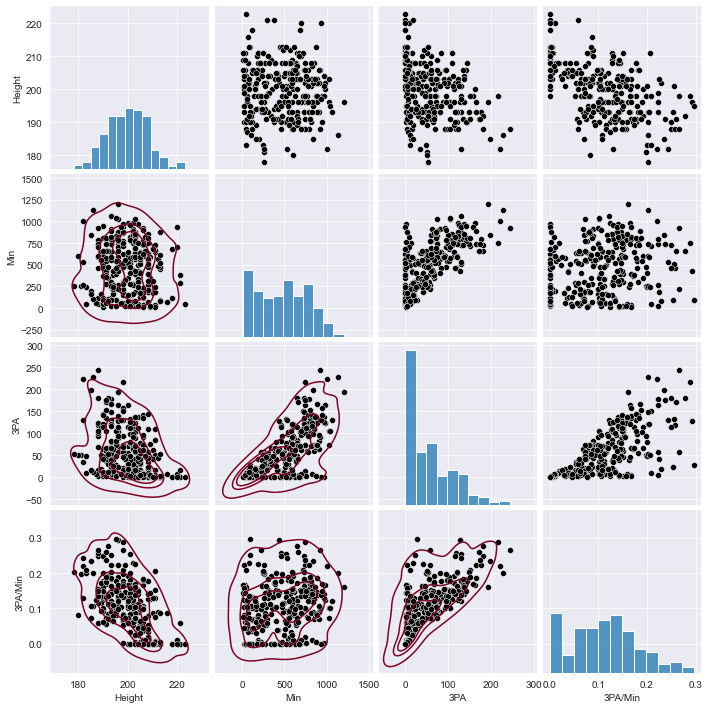

In [37]:
g = sns.pairplot(df[['Height','Min','3PA','3PA/Min']], diag_kind="hist", plot_kws={'color':'black'})
g.map_lower(sns.kdeplot, levels=4, color='xkcd:wine red');

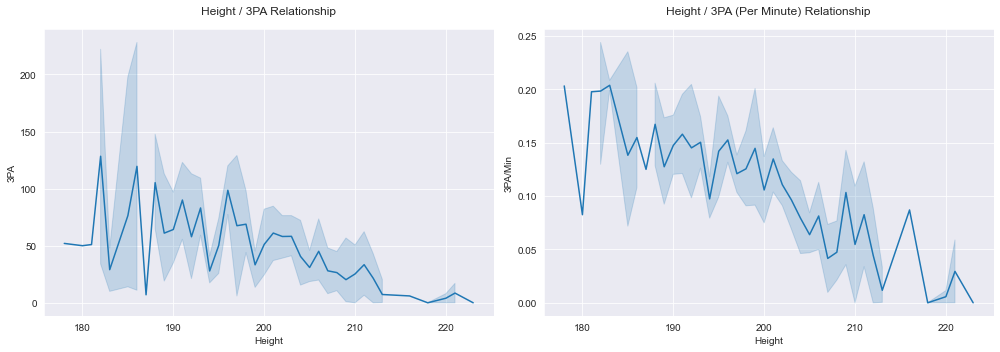

In [38]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.lineplot(x='Height', y='3PA', data=df, ax=ax[0])
sns.lineplot(x='Height', y='3PA/Min', data=df, ax=ax[1])

ax[0].set_title('Height / 3PA Relationship', pad=15)
ax[1].set_title('Height / 3PA (Per Minute) Relationship', pad=15)

fig.tight_layout();

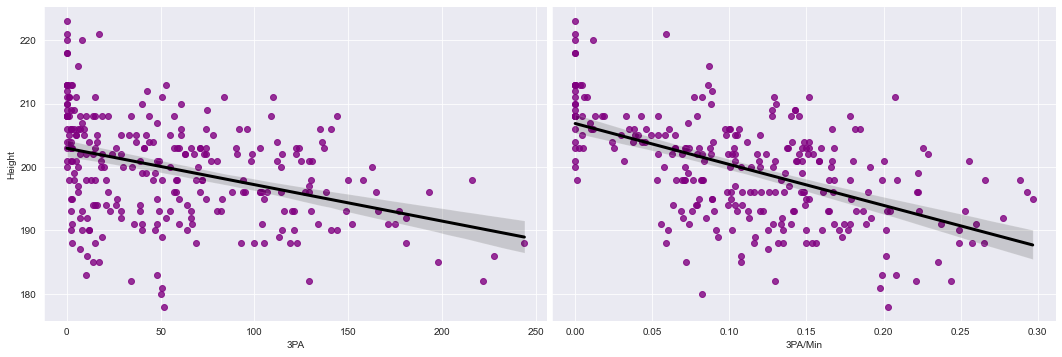

In [39]:
sns.pairplot(df, 
             y_vars=['Height'],
             x_vars=['3PA', '3PA/Min'],
             plot_kws={'color':'purple', 'line_kws': {'color':'black', 'lw': 3}}, 
             kind='reg', height=5, aspect=1.5);

<div class="alert alert-block alert-warning">

<b>***grouping of 'Height' column's values***</b>
    
</div>

In [40]:
df[['Height']].describe().T

,count,mean,std,min,25%,50%,75%,max
Height,279.000,199.756,8.218,178.000,193.000,201.000,205.000,223.000


In [41]:
df['Height_Group'] = ['178-188' if x<189 else '189-199' if x<200 else '200-210' if x<211 
                      else '211-223' for x in df['Height'].values]

In [42]:
df

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
0,"Abalde, Alberto",Real Madrid,Forward,Spain,25,202,39,761,281,50,115,43.478,0.151,200-210
1,"Abrines, Alex",FC Barcelona,Forward,Spain,27,198,39,730,237,55,130,42.308,0.178,189-199
2,"Alocen, Carlos",Real Madrid,Guard,Spain,20,194,28,376,110,11,39,28.205,0.104,189-199
3,"Amaize, Robin",FC Bayern Munich,Forward,Germany,26,188,9,51,4,0,3,0.000,0.059,178-188
4,"Anderson, James",Anadolu Efes,Forward,USA,31,198,41,622,172,23,51,45.098,0.082,189-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,"Zakharov, Denis",Zenit St Petersburg,Guard,Russian Federation,27,192,17,82,15,1,11,9.091,0.134,189-199
289,"Zipser, Paul",FC Bayern Munich,Forward,Germany,26,203,39,858,356,60,137,43.796,0.160,200-210
290,"Zizic, Ante",Maccabi Playtika Tel Aviv,Center,Croatia,23,210,34,676,309,0,0,0.000,0.000,200-210
291,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,Guard,Poland,22,200,11,150,29,7,18,38.889,0.120,200-210


In [43]:
df.groupby('Height_Group')['3PA','3PA/Min'].describe()

3PA                                                    \
               count   mean    std   min    25%    50%     75%     max   
Height_Group                                                             
178-188       24.000 88.458 77.345 3.000 16.500 60.500 124.500 244.000   
189-199      105.000 71.581 54.115 1.000 23.000 60.000 114.000 216.000   
200-210      124.000 45.032 43.931 0.000  5.000 34.500  73.250 163.000   
211-223       26.000 15.346 28.945 0.000  0.000  1.000  13.250 110.000   

             3PA/Min                                            
               count  mean   std   min   25%   50%   75%   max  
Height_Group                                                    
178-188       24.000 0.167 0.062 0.059 0.123 0.155 0.212 0.265  
189-199      105.000 0.141 0.060 0.001 0.092 0.135 0.177 0.297  
200-210      124.000 0.088 0.061 0.000 0.038 0.088 0.140 0.255  
211-223       26.000 0.038 0.058 0.000 0.000 0.004 0.081 0.207

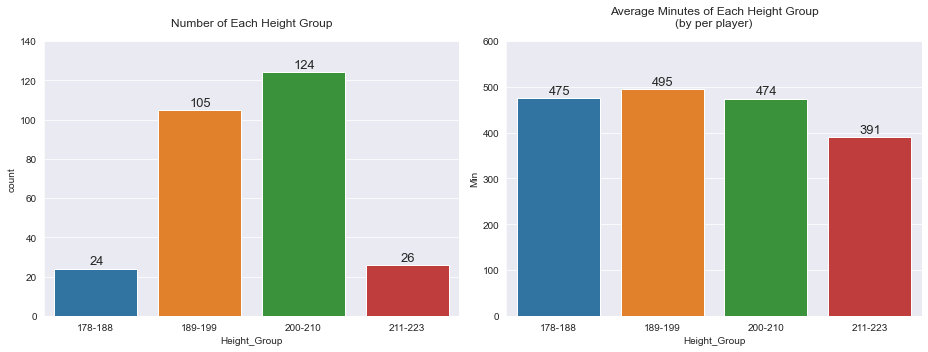

In [44]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.countplot(x="Height_Group", data=df, ax = ax[0], order=order)
sns.barplot(x="Height_Group", y="Min", data=df, ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)
    
ax[0].set_title('Number of Each Height Group', pad=15)
ax[1].set_title('Average Minutes of Each Height Group\n(by per player)', pad=15)

ax[0].set_ylim(0,140), ax[1].set_ylim(0,600)
fig.tight_layout();

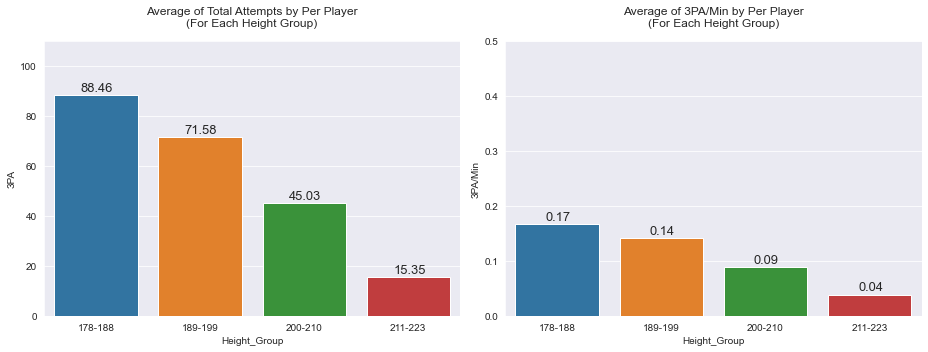

In [45]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x="Height_Group", y="3PA", data=df, ax = ax[0], order=order, ci=None)
sns.barplot(x="Height_Group", y="3PA/Min", data=df, ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average of Total Attempts by Per Player\n(For Each Height Group)', pad=15)
ax[1].set_title('Average of 3PA/Min by Per Player\n(For Each Height Group)', pad=15)

ax[0].set_ylim(0,110), ax[1].set_ylim(0,0.5)
fig.tight_layout();

### ***Distributions of 3PA For Each Height_Group***

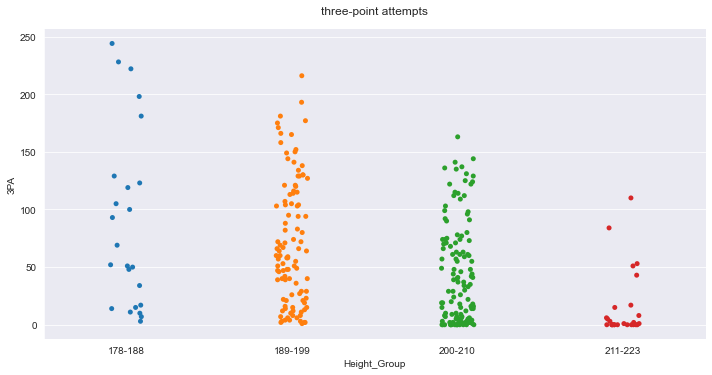

In [46]:
sns.catplot(x="Height_Group", y="3PA", data=df, height=5, aspect=2, 
            order=['178-188', '189-199', '200-210', '211-223'])

plt.title('three-point attempts', pad=15);

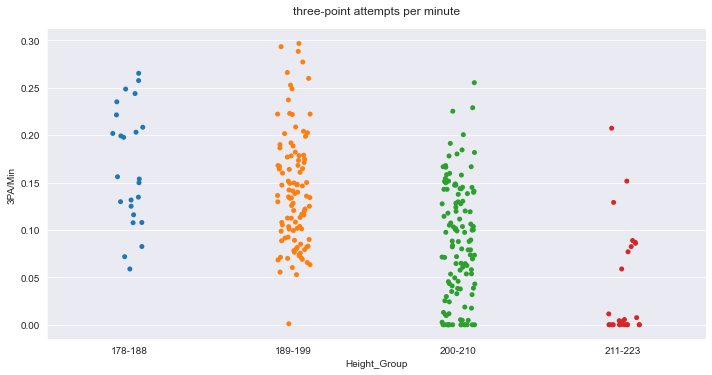

In [47]:
sns.catplot(x="Height_Group", y="3PA/Min", data=df, height=5, aspect=2, 
            order=['178-188', '189-199', '200-210', '211-223'])

plt.title('three-point attempts per minute', pad=15);

***

### ***Analysis of 0_Attempts***

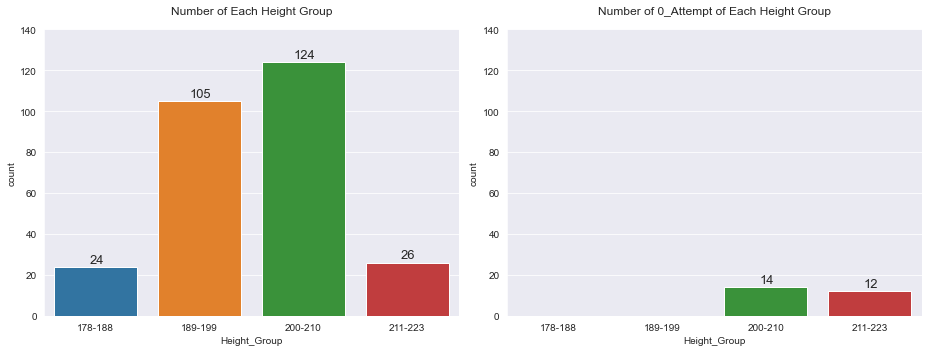

In [48]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

order=['178-188', '189-199', '200-210', '211-223']
cond = df[df['3PA'] == 0]['Height_Group']

sns.countplot(x="Height_Group", data=df, ax = ax[0], order=order)
sns.countplot(x=cond, data=df, ax = ax[1], order=order)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)
    
ax[0].set_title('Number of Each Height Group', pad=15)
ax[1].set_title('Number of 0_Attempt of Each Height Group', pad=15)

ax[0].set_ylim(0,140), ax[1].set_ylim(0,140)
fig.tight_layout();

<span style="color:purple"><b>Players who did not make any attempts can be considered to take very little time, so we will check it out.</b></span>

In [49]:
df[df['3PA'] == 0]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
9,"Bako, Ismael",LDLC ASVEL Villeurbanne,Center,Belgium,25,208,27,389,151,0,0,0.000,0.000,200-210
19,"Biligha, Paul",AX Armani Exchange Milan,Center,Italy,30,200,7,24,6,0,0,0.000,0.000,200-210
22,"Blazevic, Marek",Zalgiris Kaunas,Center,Lithuania,19,211,6,29,12,0,0,0.000,0.000,211-223
63,"Duverioglu, Ahmet",Fenerbahce Beko Istanbul,Center,Turkey,27,209,30,346,110,0,0,0.000,0.000,200-210
65,"Ellis, Octavius",Olympiacos Piraeus,Center,USA,27,208,33,472,196,0,0,0.000,0.000,200-210
66,"Eric, Michael",CSKA Moscow,Center,Nigeria,32,210,14,174,75,0,0,0.000,0.000,200-210
70,"Fall, Moustapha",LDLC ASVEL Villeurbanne,Center,France,28,218,31,682,272,0,0,0.000,0.000,211-223
71,"Fall, Youssoupha",Baskonia Vitoria-Gasteiz,Center,France,25,221,32,376,225,0,0,0.000,0.000,211-223
83,"Geben, Martinas",Zalgiris Kaunas,Center,Lithuania,26,208,33,267,108,0,0,0.000,0.000,200-210
92,"Gudaitis, Arturas",Zenit St Petersburg,Center,Lithuania,27,208,31,623,301,0,0,0.000,0.000,200-210


<span style="color:purple"><b>nearly all of the players who didn't make any attempt are 'centers'.</b></span>

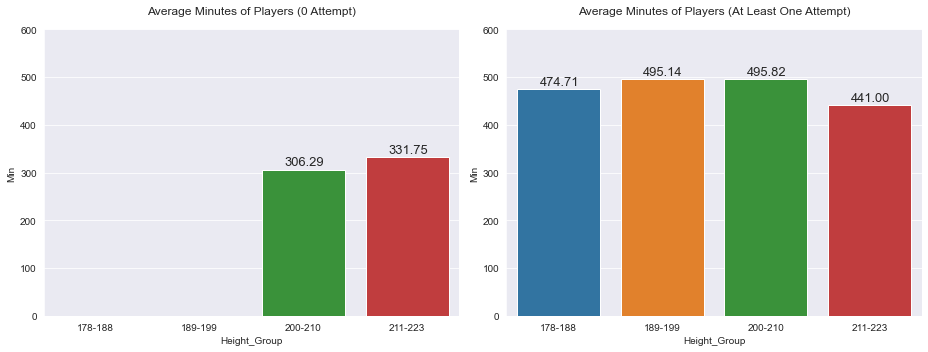

In [50]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x=df["Height_Group"], y=df[df['3PA'] == 0]['Min'], ax = ax[0], order=order, ci=None)
sns.barplot(x=df["Height_Group"], y=df[df['3PA'] != 0]['Min'], ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average Minutes of Players (0 Attempt)', pad=15)
ax[1].set_title('Average Minutes of Players (At Least One Attempt)', pad=15)

ax[0].set_ylim(0,600), ax[1].set_ylim(0,600)
fig.tight_layout();

<span style="color:purple"><b>in the first graph: It's clear that 0_Attempts isn't just about Minutes;</b></span>

<span style="color:purple"><b>in the second graph: When 0_Attempts are removed, it can be seen that the duration of the game per player is very close to each other.</b></span>

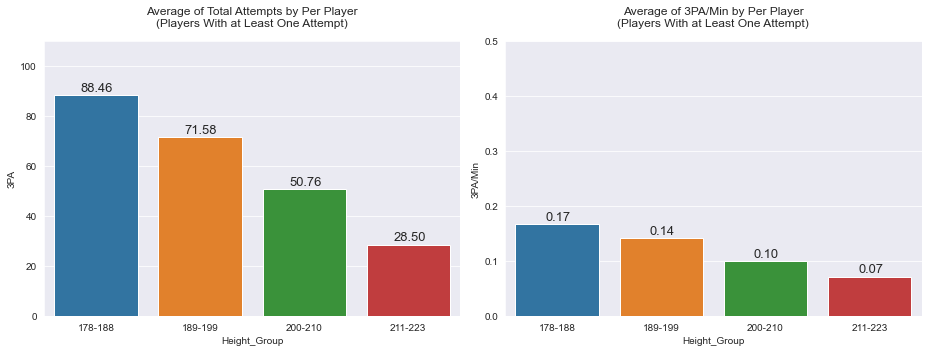

In [51]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x="Height_Group", y="3PA", data=df[df['3PA'] != 0], ax = ax[0], order=order, ci=None)
sns.barplot(x="Height_Group", y="3PA/Min", data=df[df['3PA'] != 0], ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average of Total Attempts by Per Player\n(Players With at Least One Attempt)', pad=15)
ax[1].set_title('Average of 3PA/Min by Per Player\n(Players With at Least One Attempt)', pad=15)

ax[0].set_ylim(0,110), ax[1].set_ylim(0,0.5)
fig.tight_layout();

<span style="color:purple"><b>even after removing those with no attempt, the relational order between each height group doesn't change</b></span>

<div class="alert alert-block alert-warning">

<b>***Checking outliers for each height group***</b>
    
</div>

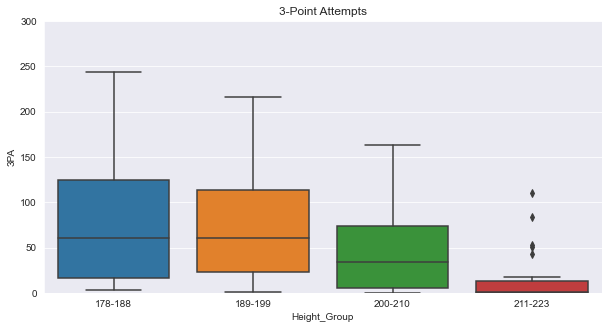

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Height_Group', y='3PA', data=df, order=['178-188', '189-199', '200-210', '211-223'])

plt.ylim(0,300)
plt.title('3-Point Attempts');

In [53]:
outliers = df[df['Height_Group'] == '211-223'].sort_values(by='3PA', ascending=False)[:4]
outliers

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
273,"Voigtmann, Johannes",CSKA Moscow,Forward,Germany,28,211,37,726,313,51,110,46.364,0.152,211-223
15,"Bender, Dragan",Maccabi Playtika Tel Aviv,Forward,Croatia,23,211,34,651,225,29,84,34.524,0.129,211-223
258,"Tobey, Mike",Valencia Basket,Center,Slovenia,26,213,33,617,318,21,53,39.623,0.086,211-223
212,"Randolph, Anthony",Real Madrid,Forward,USA,31,211,13,246,121,19,51,37.255,0.207,211-223


<span style="color:purple"><b>there are three power forwards as an outlier</b></span>

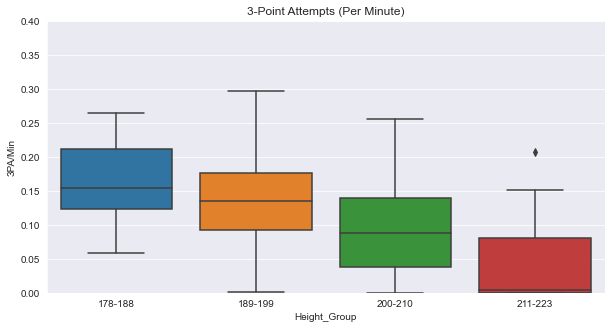

In [54]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Height_Group', y='3PA/Min', data=df, order=['178-188', '189-199', '200-210', '211-223'])

plt.ylim(0,0.4)
plt.title('3-Point Attempts (Per Minute)');

In [55]:
outliers1 = df[df['Height_Group'] == '211-223'].sort_values(by='3PA/Min', ascending=False)[:1]
outliers1

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
212,"Randolph, Anthony",Real Madrid,Forward,USA,31,211,13,246,121,19,51,37.255,0.207,211-223


<span style="color:purple"><b>Power Forward</b></span>

### ***Sample***

In [56]:
non_outliers = df[df['Height_Group'] == '211-223'].sort_values(by='3PA', ascending=False)[4:]
non_outliers

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
224,"Sanli, Sertac",Anadolu Efes,Center,Turkey,29,212,34,484,266,15,43,34.884,0.089,211-223
197,"Pleiss, Tibor",Anadolu Efes,Center,Germany,31,221,24,289,163,7,17,41.176,0.059,211-223
55,"Diop, Ilimane",Baskonia Vitoria-Gasteiz,Center,Spain,25,211,27,182,36,5,15,33.333,0.082,211-223
191,"Papagiannis, Georgios",Panathinaikos Opap Athens,Center,Greece,23,220,32,701,283,1,8,12.500,0.011,211-223
81,"Gasol, Pau",FC Barcelona,Center,Spain,40,216,7,69,32,3,6,50.000,0.087,211-223
144,"Lauvergne, Joffrey",Zalgiris Kaunas,Center,France,29,211,32,670,343,2,5,40.000,0.007,211-223
268,"Vesely, Jan",Fenerbahce Beko Istanbul,Center,Czech Republic,30,213,31,873,405,0,3,0.000,0.003,211-223
169,"Milutinov, Nikola",CSKA Moscow,Center,Serbia,26,213,20,471,197,1,2,50.000,0.004,211-223
174,"Monroe, Greg",Khimki Moscow Region,Center,USA,30,211,9,182,93,0,1,0.000,0.005,211-223
276,"Vougioukas, Ian",Panathinaikos Opap Athens,Center,Greece,35,211,3,13,4,0,1,0.000,0.077,211-223


<span style="color:purple"><b>For the 211-223 height group, it is an expected result that almost half of the players in this group did not attempt 3-pointers.</b></span>

***

<div class="alert alert-block alert-warning">

<b>***Success Rates of 3FG Attempts***</b>
    
</div>

<span style="color:purple"><b>Currently, we have created our data frame with players who have game time over ten minutes. Normally only a certain number of three-pointers should be analyzed in order to achieve accurate results in calculating success rates. But the number of the players in the dataset is limited, the analysis will be made for more than one condition. But in all cases zero attempts will not be included in the analysis.</b></span>

In [57]:
df.groupby(['Height_Group']).size()

Height_Group
178-188     24
189-199    105
200-210    124
211-223     26
dtype: int64

In [58]:
df[df['3PA'] < 10].shape[0]

74

In [59]:
df[df['3PA'] < 10].groupby(['Height_Group']).size()

# there are many players who attempted less than 10 three-pointers, 
# so we should use different conditions for the analysis

Height_Group
178-188     2
189-199    13
200-210    40
211-223    19
dtype: int64

<span style="color:purple"><b>At Least One Attempt / At Least 10 Attempts</b></span>

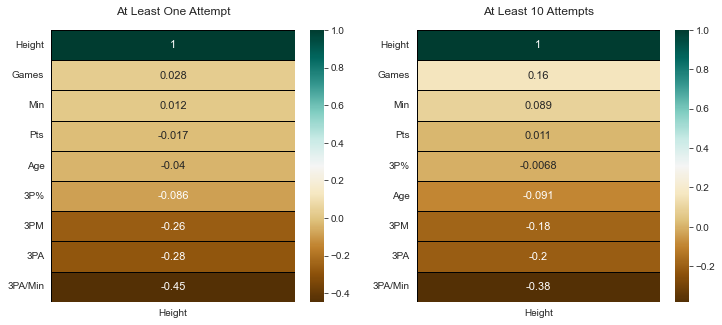

In [60]:
# Correlations

fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.heatmap(data=df[df['3PA'] != 0].corr()[['Height']].sort_values(by='Height', ascending=False), 
            annot_kws={'fontsize':11}, annot=True, cmap='BrBG', linewidth=1, linecolor='black', ax=ax[0])

sns.heatmap(data=df[df['3PA'] >= 10].corr()[['Height']].sort_values(by='Height', ascending=False), 
            annot_kws={'fontsize':11}, annot=True, cmap='BrBG', linewidth=1, linecolor='black', ax=ax[1])

ax[0].set_title('At Least One Attempt', pad=15)
ax[1].set_title('At Least 10 Attempts', pad=15)

plt.show()

In [61]:
df[df['3PA'] != 0].groupby('Height_Group')['3P%'].describe()

,count,mean,std,min,25%,50%,75%,max
Height_Group,,,,,,,,
178-188,24.000,36.034,9.639,0.000,33.197,35.793,40.966,50.000
189-199,105.000,35.664,10.681,0.000,32.759,36.913,41.379,56.198
200-210,110.000,34.417,15.095,0.000,29.659,36.536,42.937,100.000
211-223,14.000,29.976,18.604,0.000,17.708,36.069,40.882,50.000


In [62]:
df[df['3PA'] >= 10].groupby('Height_Group')['3P%'].describe()

,count,mean,std,min,25%,50%,75%,max
Height_Group,,,,,,,,
178-188,22.000,37.362,5.988,27.451,33.602,35.793,40.049,50.000
189-199,92.000,37.016,7.783,9.091,32.904,36.987,41.415,56.198
200-210,84.000,36.448,7.558,15.789,32.250,36.754,42.009,51.515
211-223,7.000,38.166,4.594,33.333,34.704,37.255,40.400,46.364


In [63]:
for group in df.Height_Group.sort_values().unique():
    
    cond1 = df[(df['3PA'] != 0) & (df.Height_Group == group)]
    cond2 = df[(df['3PA'] >= 10) & (df.Height_Group == group)]
    
    mean1_1, mean1_2 = cond1['3P%'].mean(), cond2['3P%'].mean()    
    mean2_1, mean2_2 = (cond1['3PM'].sum() / cond1['3PA'].sum())*100, (cond2['3PM'].sum() / cond2['3PA'].sum())*100
    
    av_attempt1, av_attempt2 = cond1['3PA'].mean(), cond2['3PA'].mean()
    
    print(f'Height_Group {group}: ' )
    print('')
    print('At Least One Attempt\t\t\t  |\tAt Least 10-Attempts')
    print('')
    print(f'Number of Player\t      : {cond1.shape[0]}\t  |\tNumber of Player\t      : {cond2.shape[0]}')
    print(f'Mean1 (Mean of 3P%)\t      : {round(mean1_1, 3)}\t  |\tMean1 (Mean of 3P%)\t      : {round(mean1_2, 3)}')
    print(f"Mean2 (Group's Total 3PM/3PA) : {round(mean2_1, 3)}\t  |\tMean2 (Group's Total 3PM/3PA) : {round(mean2_2, 3)}")
    print(f'Average Attempt\t\t      : {round(av_attempt1, 0)}\t  |\tAverage Attempt\t\t      : {round(av_attempt2, 0)}')
    
    if group != '211-223':
        print('-------------------------------------------------------------------------------------------------')

Height_Group 178-188: 

At Least One Attempt			  |	At Least 10-Attempts

Number of Player	      : 24	  |	Number of Player	      : 22
Mean1 (Mean of 3P%)	      : 36.034	  |	Mean1 (Mean of 3P%)	      : 37.362
Mean2 (Group's Total 3PM/3PA) : 37.353	  |	Mean2 (Group's Total 3PM/3PA) : 37.388
Average Attempt		      : 88.0	  |	Average Attempt		      : 96.0
-------------------------------------------------------------------------------------------------
Height_Group 189-199: 

At Least One Attempt			  |	At Least 10-Attempts

Number of Player	      : 105	  |	Number of Player	      : 92
Mean1 (Mean of 3P%)	      : 35.664	  |	Mean1 (Mean of 3P%)	      : 37.016
Mean2 (Group's Total 3PM/3PA) : 37.547	  |	Mean2 (Group's Total 3PM/3PA) : 37.601
Average Attempt		      : 72.0	  |	Average Attempt		      : 81.0
-------------------------------------------------------------------------------------------------
Height_Group 200-210: 

At Least One Attempt			  |	At Least 10-Attempts

Number of Player	      :

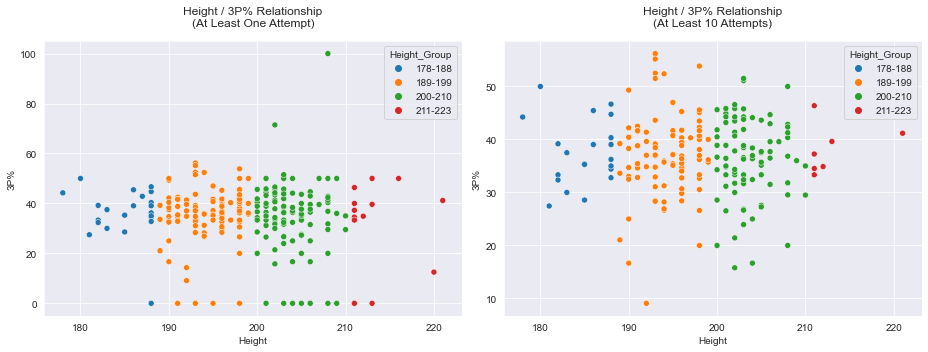

In [64]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.scatterplot(x='Height', y='3P%', data=df[df['3PA'] != 0], hue='Height_Group', hue_order=order, ax=ax[0])
sns.scatterplot(x='Height', y='3P%', data=df[df['3PA'] >= 10], hue='Height_Group', hue_order=order, ax=ax[1])

ax[0].set_title('Height / 3P% Relationship\n(At Least One Attempt)', pad=15)
ax[1].set_title('Height / 3P% Relationship\n(At Least 10 Attempts)', pad=15)

fig.tight_layout();

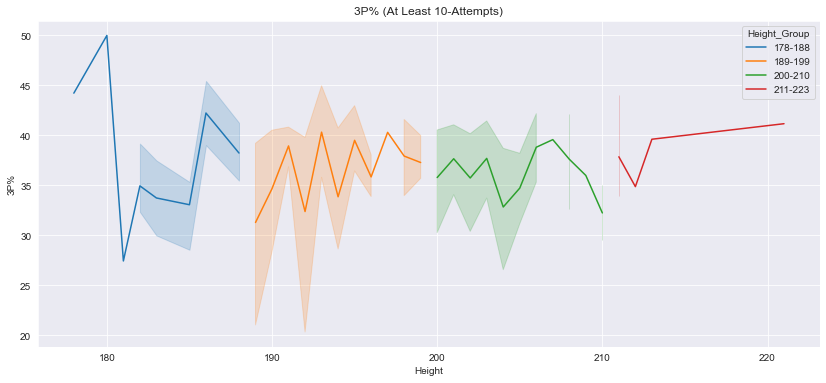

In [65]:
plt.figure(figsize=(14,6))

order = ['178-188', '189-199', '200-210', '211-223']

sns.lineplot(data=df[df['3PA'] >= 10], x='Height', y='3P%', hue='Height_Group', hue_order=order)

plt.title('3P% (At Least 10-Attempts)');

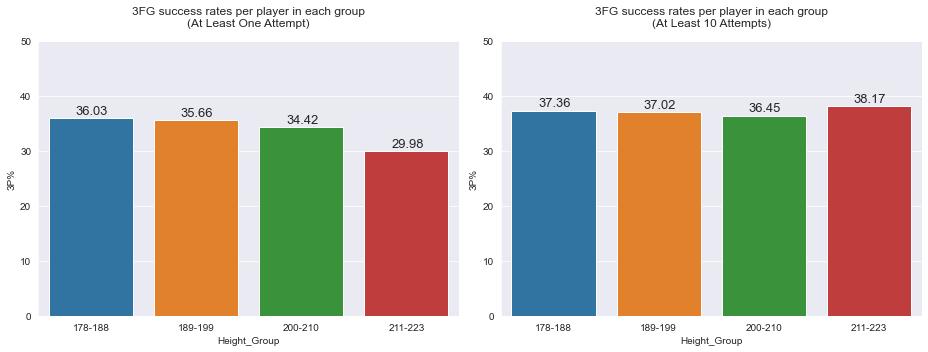

In [66]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x="Height_Group", y="3P%", data=df[df['3PA'] != 0], ax = ax[0], order=order, ci=None)
sns.barplot(x="Height_Group", y="3P%", data=df[df['3PA'] >= 10], ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('3FG success rates per player in each group\n(At Least One Attempt)', pad=15)
ax[1].set_title('3FG success rates per player in each group\n(At Least 10 Attempts)', pad=15)

ax[0].set_ylim(0,50), ax[1].set_ylim(0,50)
fig.tight_layout();

In [67]:
df[(df['3PA'] >= 10) & (df.Height_Group == '211-223')]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
15,"Bender, Dragan",Maccabi Playtika Tel Aviv,Forward,Croatia,23,211,34,651,225,29,84,34.524,0.129,211-223
55,"Diop, Ilimane",Baskonia Vitoria-Gasteiz,Center,Spain,25,211,27,182,36,5,15,33.333,0.082,211-223
197,"Pleiss, Tibor",Anadolu Efes,Center,Germany,31,221,24,289,163,7,17,41.176,0.059,211-223
212,"Randolph, Anthony",Real Madrid,Forward,USA,31,211,13,246,121,19,51,37.255,0.207,211-223
224,"Sanli, Sertac",Anadolu Efes,Center,Turkey,29,212,34,484,266,15,43,34.884,0.089,211-223
258,"Tobey, Mike",Valencia Basket,Center,Slovenia,26,213,33,617,318,21,53,39.623,0.086,211-223
273,"Voigtmann, Johannes",CSKA Moscow,Forward,Germany,28,211,37,726,313,51,110,46.364,0.152,211-223


<span style="color:purple"><b>When we removed 0-Attempts, success rates get closer to each other. In the second condition, the last group has the highest success rate. But the last group also has the fewest players.</b></span>

In [68]:
df[df['3PA'] >= 10].groupby('Height_Group').size()

Height_Group
178-188    22
189-199    92
200-210    84
211-223     7
dtype: int64

<div class="alert alert-block alert-warning">

<b>***OUTLIERS (At Least 10 Attempts)***</b>
    
</div>

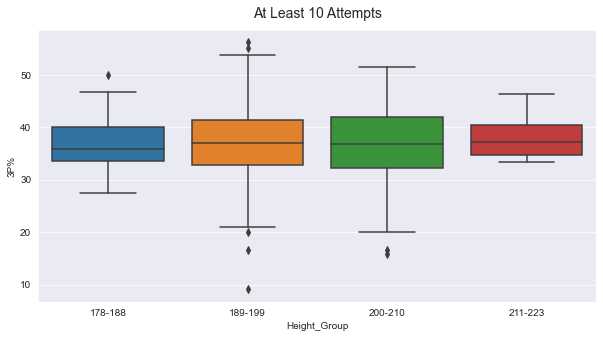

In [69]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Height_Group', y='3P%', data=df[(df['3PA'] >= 10)], order=['178-188', '189-199', '200-210', '211-223'])
plt.title('At Least 10 Attempts',fontdict={'fontsize': 14}, pad=12);

In [70]:
df[(df['3PA'] >= 10) & (df['3P%'] >= 50)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
46,"Datome, Luigi",AX Armani Exchange Milan,Forward,Italy,33,203,37,611,261,46,90,51.111,0.147,200-210
56,"Diot, Antoine",LDLC ASVEL Villeurbanne,Guard,France,31,193,30,563,178,42,80,52.500,0.142,189-199
109,"Howard, William",LDLC ASVEL Villeurbanne,Forward,France,27,203,22,393,187,34,66,51.515,0.168,200-210
121,"Jovic, Stefan",Khimki Moscow Region,Guard,Serbia,30,198,8,185,35,7,13,53.846,0.070,189-199
135,"Kuric, Kyle",FC Barcelona,Forward,Slovakia,31,193,39,735,339,68,121,56.198,0.165,189-199
147,"Lekavicius, Lukas",Zalgiris Kaunas,Guard,Lithuania,26,180,33,606,271,25,50,50.000,0.083,178-188
175,"Moraschini, Riccardo",AX Armani Exchange Milan,Guard,Italy,29,194,24,265,75,11,21,52.381,0.079,189-199
189,"Oriola, Pierre",FC Barcelona,Center,Spain,28,208,38,571,204,5,10,50.000,0.018,200-210
230,"Seeley, Dennis",FC Bayern Munich,Guard,USA,31,193,27,550,219,34,66,51.515,0.120,189-199
270,"Vialtsev, Egor",Khimki Moscow Region,Forward,Russian Federation,35,193,17,258,70,16,29,55.172,0.112,189-199


In [71]:
df[(df['3PA'] >= 10) & (df['3P%'] <= 20)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
38,"Charalampopoulos, Vasilis",Olympiacos Piraeus,Forward,Greece,23,202,11,83,28,3,19,15.789,0.229,200-210
40,"Claver, Victor",FC Barcelona,Forward,Spain,32,208,15,190,34,3,15,20.000,0.079,200-210
88,"Gist, James",FC Bayern Munich,Forward,USA,34,204,23,497,128,2,12,16.667,0.024,200-210
129,"Khvostov, Dmitry",Zenit St Petersburg,Guard,Russian Federation,31,190,18,118,18,2,12,16.667,0.102,189-199
139,"Lacombe, Paul",LDLC ASVEL Villeurbanne,Guard,France,30,198,25,284,59,3,15,20.000,0.053,189-199
200,"Ponkrashov, Anton",Khimki Moscow Region,Forward,Russian Federation,34,200,9,156,22,4,20,20.000,0.128,200-210
288,"Zakharov, Denis",Zenit St Petersburg,Guard,Russian Federation,27,192,17,82,15,1,11,9.091,0.134,189-199


***

<div class="alert alert-block alert-danger">
    
<b>2. Analysis of 3-point attempts (Position-based)</b> 
   
</div>

***GUARD***

**Point Guard** >>>> The point guard (PG),also known as the one, is typically the team's shortest player and best ball handler and passer. They usually are very fast and are good at driving and short-range.

**Shooting Guard** >>>> The shooting guard (SG) is also known as the two or the off guard. Along with the small forward, a shooting guard is often referred to as a wing because of its use in common positioning tactics. As the name suggests, most shooting guards are prolific from the three-point range and long mid range.

***FORWARD***

**Small Forward** >>>> The small forward (SF), also known as the three, is considered to be the most versatile of the main five basketball positions. Versatility is key for small forwards due to the nature of their role, which resembles that of a shooting guard more often than that of a small forward. This is why the small forward and shooting guard positions are often used interchangeably and referred to as wings.

**Power Forward** >>>> The power forward (PF), also known as the four, often plays a role similar to that of the center, down in the "post" or "low blocks". The power forward is often the team's most powerful and dependable scorer, being able to score close to the basket while also being able to shoot mid-range jump shots from 10 – 15 feet from the basket. Some power forwards have become known as stretch fours, since extending their shooting range to **three-pointers.**

***CENTER***

The center (C), also known as the five, pivot or big man, usually plays near the baseline or close to the basket (the "low post"). They are usually the tallest players on the floor. Centers usually score "down low", or "in the paint" (near the basket, in the key), but some can be good perimeter shooters.

<div class="alert alert-block alert-warning">

<b>General Stats</b>
    
</div>

In [72]:
df.groupby(['Position'])['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Center,62.000,209.161,5.463,198.000,206.000,208.000,212.750,223.000
Forward,100.000,202.350,4.405,187.000,200.750,203.000,205.000,211.000
Guard,117.000,192.556,4.923,178.000,190.000,193.000,196.000,202.000


In [73]:
df.groupby(['Position'])[['3PA', '3PA/Min']].describe()

3PA                                                   3PA/Min  \
           count   mean    std   min    25%    50%     75%     max   count   
Position                                                                     
Center    62.000 16.565 30.134 0.000  0.000  2.000  15.750 141.000  62.000   
Forward  100.000 56.100 42.109 0.000 18.750 51.000  81.000 163.000 100.000   
Guard    117.000 76.795 60.968 2.000 21.000 60.000 119.000 244.000 117.000   

                                                    
          mean   std   min   25%   50%   75%   max  
Position                                            
Center   0.035 0.049 0.000 0.000 0.005 0.063 0.182  
Forward  0.112 0.056 0.000 0.073 0.106 0.150 0.297  
Guard    0.148 0.059 0.032 0.103 0.140 0.191 0.288

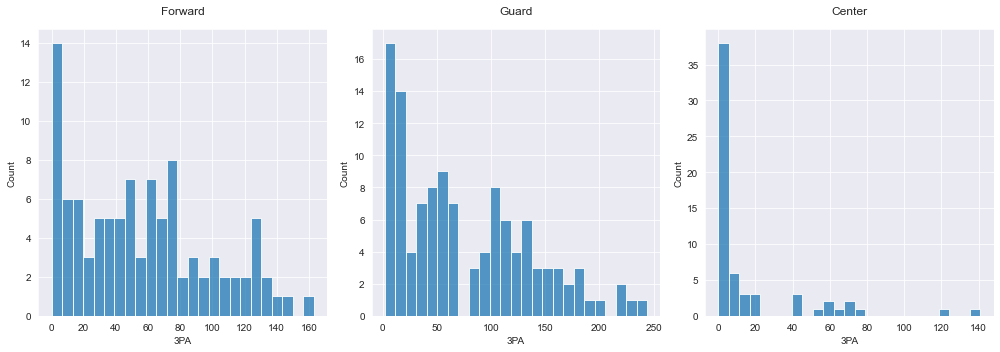

In [74]:
# 3-point attempts for each group

fig, ax = plt.subplots(1,3, figsize=(14,5))

sns.histplot(x=df[df.Position=='Forward']['3PA'], bins=25, data=df, ax=ax[0])
sns.histplot(x=df[df.Position=='Guard']['3PA'], bins=25, data=df, ax=ax[1])
sns.histplot(x=df[df.Position=='Center']['3PA'], bins=25, data=df, ax=ax[2])

ax[0].set_title('Forward', pad=15)
ax[1].set_title('Guard', pad=15)
ax[2].set_title('Center', pad=15)

fig.tight_layout();

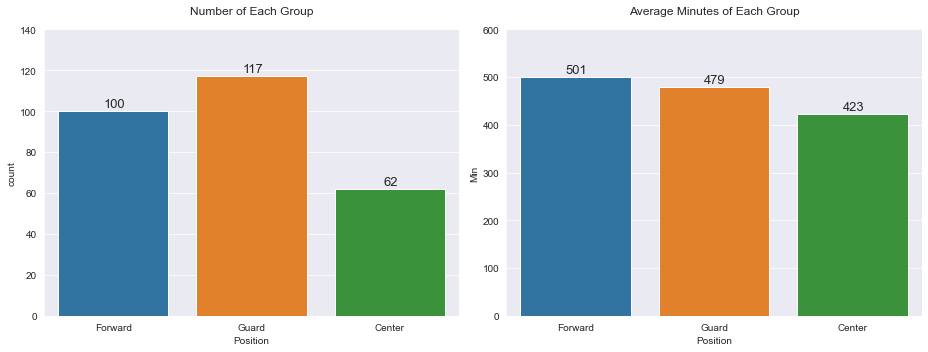

In [75]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.countplot(x='Position', data=df, ax = ax[0])
sns.barplot(x='Position', y='Min', data=df, ax = ax[1], ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)
    
ax[0].set_title('Number of Each Group', pad=15)
ax[1].set_title('Average Minutes of Each Group', pad=15)

ax[0].set_ylim(0,140), ax[1].set_ylim(0,600)
fig.tight_layout();

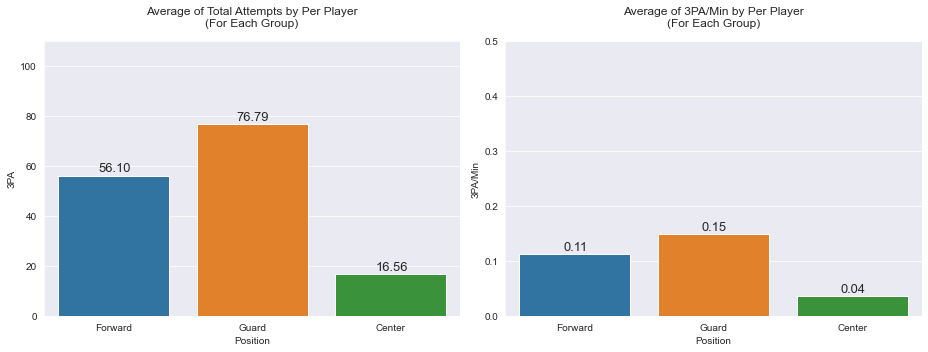

In [76]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.barplot(x='Position', y='3PA', data=df, ax = ax[0], ci=None)
sns.barplot(x='Position', y='3PA/Min', data=df, ax = ax[1], ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average of Total Attempts by Per Player\n(For Each Group)', pad=15)
ax[1].set_title('Average of 3PA/Min by Per Player\n(For Each Group)', pad=15)

ax[0].set_ylim(0,110), ax[1].set_ylim(0,0.5)
fig.tight_layout();

### ***Distributions of 3PA For Each Height_Group***

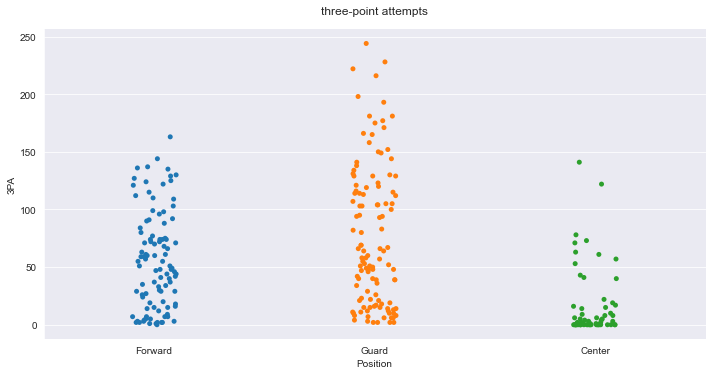

In [77]:
sns.catplot(x='Position', y='3PA', data=df, height=5, aspect=2)

plt.title('three-point attempts', pad=15);

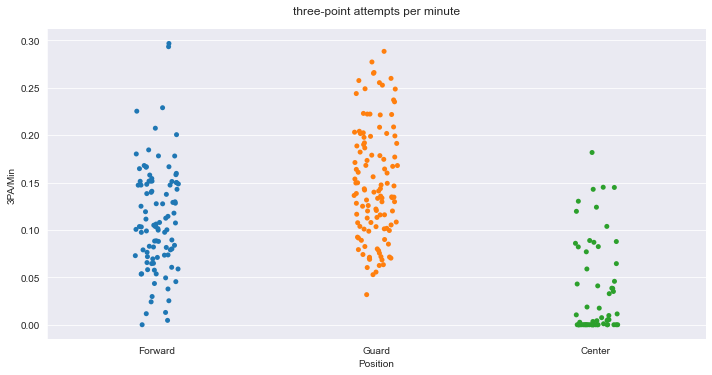

In [78]:
sns.catplot(x='Position', y='3PA/Min', data=df, height=5, aspect=2)

plt.title('three-point attempts per minute', pad=15);

***

### ***Analysis of 0_Attempts***

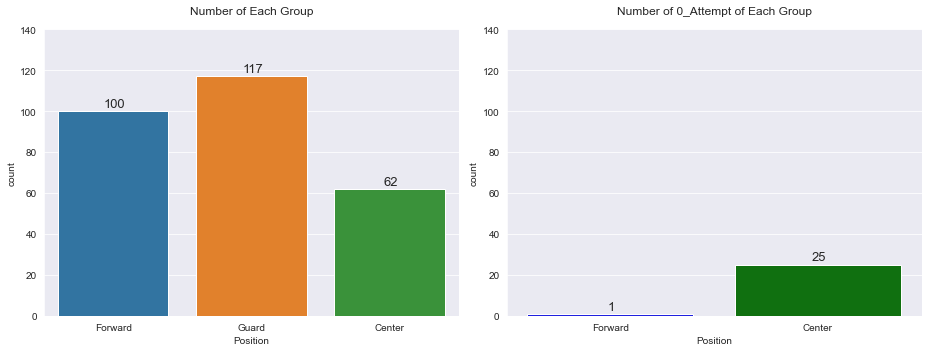

In [79]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

cond = df[df['3PA'] == 0]['Position']

sns.countplot(x='Position', data=df, ax = ax[0])
sns.countplot(x=cond, data=df, palette=['b', 'g'], order=['Forward','Center'], ax = ax[1])

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)
    
ax[0].set_title('Number of Each Group', pad=15)
ax[1].set_title('Number of 0_Attempt of Each Group', pad=15)

ax[0].set_ylim(0,140), ax[1].set_ylim(0,140)
fig.tight_layout();

<span style="color:purple"><b>Players who did not make any attempts can be considered to take very little time, so we will check it out again.</b></span>

In [80]:
df[df['3PA'] == 0]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
9,"Bako, Ismael",LDLC ASVEL Villeurbanne,Center,Belgium,25,208,27,389,151,0,0,0.000,0.000,200-210
19,"Biligha, Paul",AX Armani Exchange Milan,Center,Italy,30,200,7,24,6,0,0,0.000,0.000,200-210
22,"Blazevic, Marek",Zalgiris Kaunas,Center,Lithuania,19,211,6,29,12,0,0,0.000,0.000,211-223
63,"Duverioglu, Ahmet",Fenerbahce Beko Istanbul,Center,Turkey,27,209,30,346,110,0,0,0.000,0.000,200-210
65,"Ellis, Octavius",Olympiacos Piraeus,Center,USA,27,208,33,472,196,0,0,0.000,0.000,200-210
66,"Eric, Michael",CSKA Moscow,Center,Nigeria,32,210,14,174,75,0,0,0.000,0.000,200-210
70,"Fall, Moustapha",LDLC ASVEL Villeurbanne,Center,France,28,218,31,682,272,0,0,0.000,0.000,211-223
71,"Fall, Youssoupha",Baskonia Vitoria-Gasteiz,Center,France,25,221,32,376,225,0,0,0.000,0.000,211-223
83,"Geben, Martinas",Zalgiris Kaunas,Center,Lithuania,26,208,33,267,108,0,0,0.000,0.000,200-210
92,"Gudaitis, Arturas",Zenit St Petersburg,Center,Lithuania,27,208,31,623,301,0,0,0.000,0.000,200-210


<span style="color:purple"><b>nearly all of the players who didn't make any attempt are 'centers'.</b></span>

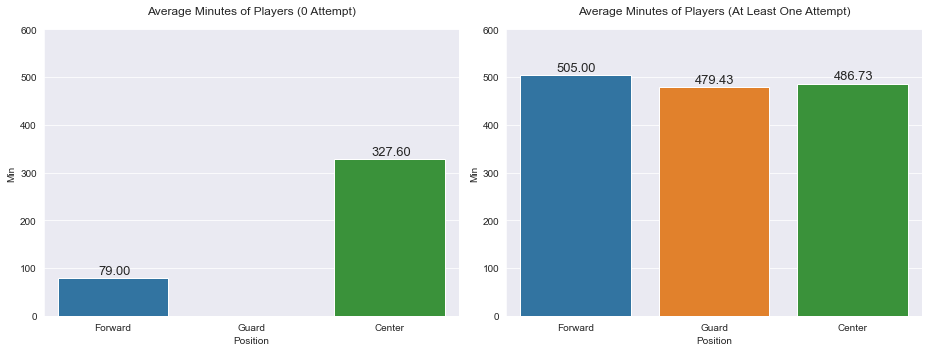

In [81]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.barplot(x=df["Position"], y=df[df['3PA'] == 0]['Min'], ax = ax[0], ci=None)
sns.barplot(x=df["Position"], y=df[df['3PA'] != 0]['Min'], ax = ax[1], ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average Minutes of Players (0 Attempt)', pad=15)
ax[1].set_title('Average Minutes of Players (At Least One Attempt)', pad=15)

ax[0].set_ylim(0,600), ax[1].set_ylim(0,600)
fig.tight_layout();

<span style="color:purple"><b>for the 'Center' position, it seems that 0_Attempts is not related to Minutes;</b></span>

<span style="color:purple"><b>in the second graph: When 0_Attempts are removed, it is seen that the duration of the game per player is very close to each other. But we know that the last group also has the fewest players.</b></span>

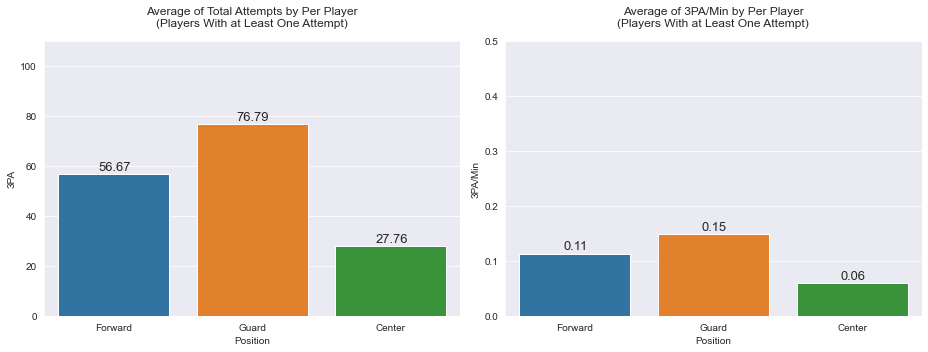

In [82]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.barplot(x="Position", y="3PA", data=df[df['3PA'] != 0], ax = ax[0], ci=None)
sns.barplot(x="Position", y="3PA/Min", data=df[df['3PA'] != 0], ax = ax[1], ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average of Total Attempts by Per Player\n(Players With at Least One Attempt)', pad=15)
ax[1].set_title('Average of 3PA/Min by Per Player\n(Players With at Least One Attempt)', pad=15)

ax[0].set_ylim(0,110), ax[1].set_ylim(0,0.5)
fig.tight_layout();

<span style="color:purple"><b>even after removing those with no attempt, the relational order between each group doesn't change</b></span>

***

<div class="alert alert-block alert-warning">

<b>relationship between 'Height' and '3PA' for each position</b>
    
</div>

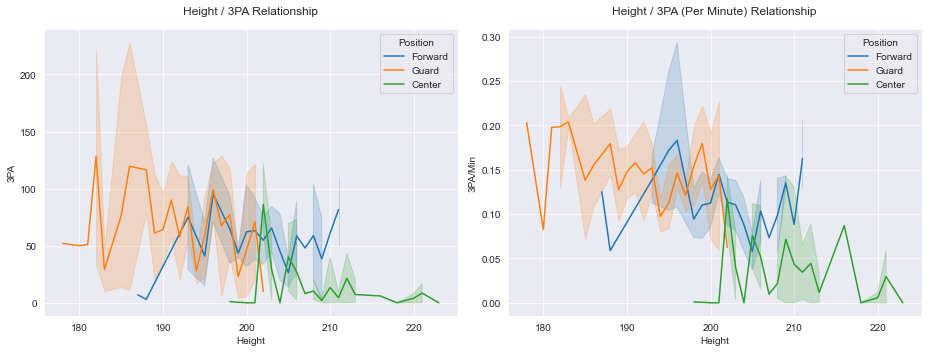

In [83]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.lineplot(y='3PA', x='Height', data=df, hue='Position', ax=ax[0])
sns.lineplot(y='3PA/Min', x='Height', hue='Position', data=df, ax=ax[1])

ax[0].set_title('Height / 3PA Relationship', pad=15)
ax[1].set_title('Height / 3PA (Per Minute) Relationship', pad=15)

fig.tight_layout();

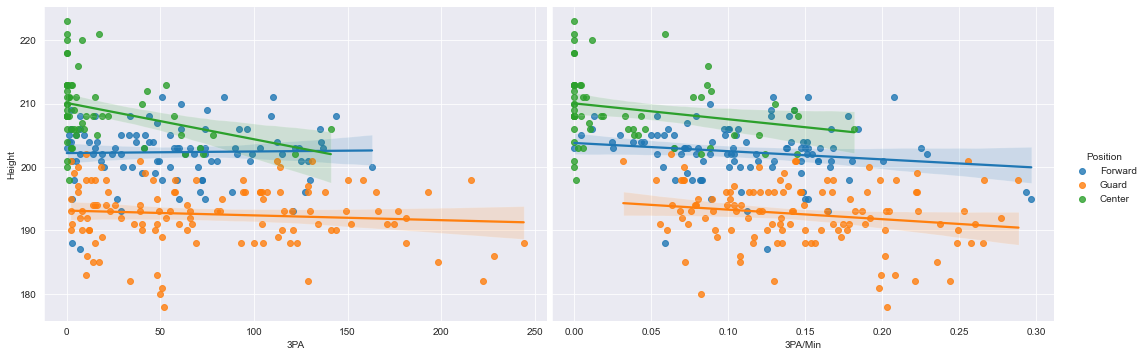

In [84]:
sns.pairplot(df, hue='Position',
             y_vars=['Height'],
             x_vars=['3PA', '3PA/Min'],
             kind='reg', height=5, aspect=1.5);

<span style="color:purple"><b>It seems that there isn't a negative correlation between Height and 3PA for the 'Forward' position, let's check it out.</b></span>

In [85]:
for group in df.Position.unique():
    
    corr1 = round(df[df.Position==group]['3PA'].corr(df.Height), 3)
    
    print(f'3PA correlation with Height for {group} position : {corr1}')
    
print('')

for group in df.Position.unique():
    
    corr2 = round(df[df.Position==group]['3PA/Min'].corr(df.Height), 3)
    
    print(f'3PA/Min correlation with Height for {group} position : {corr2}')

3PA correlation with Height for Forward position : 0.024
3PA correlation with Height for Guard position : -0.094
3PA correlation with Height for Center position : -0.316

3PA/Min correlation with Height for Forward position : -0.164
3PA/Min correlation with Height for Guard position : -0.181
3PA/Min correlation with Height for Center position : -0.224


In [86]:
# SAMPLE

df[(df.Position == 'Forward') & (df['3PA'] > 70)][['Player','Height','Min','3PA','3PA/Min']].sort_values(by='Height')

,Player,Height,Min,3PA,3PA/Min
135,"Kuric, Kyle",193,735,121,0.165
148,"Lighty, David",195,836,74,0.089
60,"Dragic, Zoran",196,594,88,0.148
72,"Fernandez, Rudy",196,433,127,0.293
123,"Kahudi, Charles",196,658,71,0.108
1,"Abrines, Alex",198,730,130,0.178
196,"Pierre, Dyshawn",198,870,72,0.083
199,"Ponitka, Mateusz",198,883,72,0.082
86,"Giedraitis, Rokas",200,981,163,0.166
42,"Clyburn, Will",201,815,129,0.158


<span style="color:purple"><b>Although the main duties of a power forward include posting up and setting screens, in today's modern basketball and in Euroleague, the power forward is a shooter, who can stretch their range all the way out to the 3-point line. That's why they are often called a stretch four if they are able to shoot from that distance. As clearly seen above there are a lot of stretch fours.</b></span>

### ***Let's divide each position into groups according to height***

In [87]:
df.groupby('Position')['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Center,62.000,209.161,5.463,198.000,206.000,208.000,212.750,223.000
Forward,100.000,202.350,4.405,187.000,200.750,203.000,205.000,211.000
Guard,117.000,192.556,4.923,178.000,190.000,193.000,196.000,202.000


In [88]:
for group in df.Position.unique():
    
    min_h = df[df.Position == group]['Height'].min()
    max_h = df[df.Position == group]['Height'].max()

    for height in range(min_h, max_h, 10):
        
        cond = df[(df.Height >= height) & (df.Height < height+10) & (df.Position==group)]['3PA']
    
        avr = cond.mean()
        numofplayer = len(cond)
        
        if max_h - height > 10:        
            print(f'{group} - {height} / {height+9} - {numofplayer} players - 3PA Average: {round(avr,3)}')
        else:
            print(f'{group} - {height} / {max_h} - {numofplayer} players - 3PA Average: {round(avr,3)}')
        
    print('-------------------------------------------------------------------')

Forward - 187 / 196 - 11 players - 3PA Average: 55.455
Forward - 197 / 206 - 76 players - 3PA Average: 55.474
Forward - 207 / 211 - 13 players - 3PA Average: 60.308
-------------------------------------------------------------------
Guard - 178 / 187 - 13 players - 3PA Average: 81.846
Guard - 188 / 197 - 83 players - 3PA Average: 79.434
Guard - 198 / 202 - 21 players - 3PA Average: 63.238
-------------------------------------------------------------------
Center - 198 / 207 - 22 players - 3PA Average: 32.091
Center - 208 / 217 - 33 players - 3PA Average: 8.97
Center - 218 / 223 - 7 players - 3PA Average: 3.571
-------------------------------------------------------------------


In [89]:
for group in df.Position.unique():
    
    min_h = df[df.Position == group]['Height'].min()
    max_h = df[df.Position == group]['Height'].max()

    for height in range(min_h, max_h, 10):
        
        cond = df[(df.Height >= height) & (df.Height < height+10) & (df.Position==group)]['3PA/Min']
    
        avr = cond.mean()
        numofplayer = len(cond)
        
        if max_h - height > 10:        
            print(f'{group} - {height} / {height+9} - {numofplayer} players - 3PA/Min Average: {round(avr,3)}')
        else:
            print(f'{group} - {height} / {max_h} - {numofplayer} players - 3PA/Min Average: {round(avr,3)}')
        
    print('-------------------------------------------------------------------')

Forward - 187 / 196 - 11 players - 3PA/Min Average: 0.154
Forward - 197 / 206 - 76 players - 3PA/Min Average: 0.105
Forward - 207 / 211 - 13 players - 3PA/Min Average: 0.116
-------------------------------------------------------------------
Guard - 178 / 187 - 13 players - 3PA/Min Average: 0.17
Guard - 188 / 197 - 83 players - 3PA/Min Average: 0.145
Guard - 198 / 202 - 21 players - 3PA/Min Average: 0.146
-------------------------------------------------------------------
Center - 198 / 207 - 22 players - 3PA/Min Average: 0.052
Center - 208 / 217 - 33 players - 3PA/Min Average: 0.03
Center - 218 / 223 - 7 players - 3PA/Min Average: 0.01
-------------------------------------------------------------------


<span style="color:purple"><b>When we group the positions according to their height, we can see the negative relationship between height and 3-point attempts in general, with exceptions. However, since the number of groups is not equal, we cannot evaluate the relationship correctly. We still need to specifically review 'Forward'</b></span>

In [90]:
df[(df.Position == 'Forward') & (df.Height >= 207)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
13,"Barthel, Danilo",Fenerbahce Beko Istanbul,Forward,Germany,29,208,29,633,184,14,34,41.176,0.054,200-210
15,"Bender, Dragan",Maccabi Playtika Tel Aviv,Forward,Croatia,23,211,34,651,225,29,84,34.524,0.129,211-223
40,"Claver, Victor",FC Barcelona,Forward,Spain,32,208,15,190,34,3,15,20.000,0.079,200-210
118,"Johnson, Jajuan",FC Bayern Munich,Forward,USA,31,208,38,540,163,0,7,0.000,0.013,200-210
138,"Labeyrie, Louis",Valencia Basket,Forward,France,28,209,29,588,218,27,75,36.000,0.128,200-210
170,"Mirotic, Nikola",FC Barcelona,Forward,Spain,29,208,33,854,514,45,109,41.284,0.128,200-210
171,"Mitoglou, Konstantinos",Panathinaikos Opap Athens,Forward,Greece,24,210,34,691,317,18,61,29.508,0.088,200-210
212,"Randolph, Anthony",Real Madrid,Forward,USA,31,211,13,246,121,19,51,37.255,0.207,211-223
228,"Schneider, Tim",Alba Berlin,Forward,Germany,23,208,28,315,78,13,44,29.545,0.140,200-210
236,"Simanic, Borisa",Crvena Zvezda Mts Belgrade,Forward,Serbia,22,209,3,14,3,1,2,50.000,0.143,200-210


<span style="color:purple"><b>As seen above, these players are Power Forwards</b></span>

<div class="alert alert-block alert-warning">

<b>***Checking outliers for each height group***</b>
    
</div>

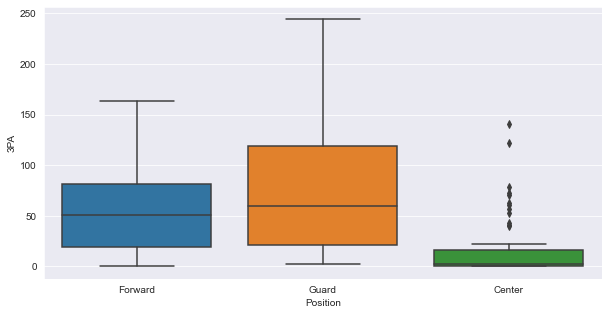

In [91]:
# 3-point attempts

plt.figure(figsize=(10, 5))
sns.boxplot(x='Position', y='3PA', data=df);

In [92]:
IQR = df[df.Position=='Center']['3PA'].quantile(0.75) - df[df.Position=='Center']['3PA'].quantile(0.25)
IQR

15.75

In [93]:
upper_lim = df[df.Position=='Center']['3PA'].quantile(0.75) + 1.5*IQR
upper_lim

39.375

In [94]:
# due to '0' attempts, we have many outliers for the 'Center' position

df[(df.Position=='Center') & (df['3PA'] > upper_lim)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
61,"Dubljevic, Bojan",Valencia Basket,Center,Montenegro,29,205,29,652,285,26,78,33.333,0.120,200-210
80,"Garuba, Usman",Real Madrid,Center,Spain,18,203,39,636,153,11,41,26.829,0.064,200-210
117,"Jerebko, Jonas",Khimki Moscow Region,Center,Sweden,33,208,15,393,173,23,57,40.351,0.145,200-210
146,"Leday, Zach",AX Armani Exchange Milan,Center,USA,26,202,36,889,360,34,73,46.575,0.082,200-210
166,"Mickey, Jordan",Khimki Moscow Region,Center,USA,26,203,28,809,438,17,71,23.944,0.088,200-210
184,"Noua, Amine",LDLC ASVEL Villeurbanne,Center,France,23,202,28,435,140,20,63,31.746,0.145,200-210
195,"Peters, Alec",Baskonia Vitoria-Gasteiz,Center,USA,25,206,33,776,379,63,141,44.681,0.182,200-210
198,"Polonara, Achille",Baskonia Vitoria-Gasteiz,Center,Italy,29,202,33,984,401,54,122,44.262,0.124,200-210
213,"Reath, Duop",Crvena Zvezda Mts Belgrade,Center,Australia,24,210,23,307,111,14,40,35.000,0.130,200-210
224,"Sanli, Sertac",Anadolu Efes,Center,Turkey,29,212,34,484,266,15,43,34.884,0.089,211-223


<span style="color:purple"><b>Although they are in the 'Center' position, we know that many of them are actually power forwards.</b></span>

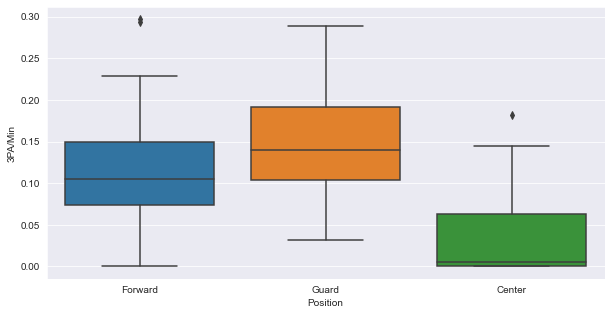

In [95]:
# 3-point attempts per minute

plt.figure(figsize=(10, 5))
sns.boxplot(x='Position', y='3PA/Min', data=df);

In [96]:
IQR1 = df[df.Position=='Forward']['3PA/Min'].quantile(0.75) - df[df.Position=='Forward']['3PA/Min'].quantile(0.25)
IQR1

0.07655803277235398

In [97]:
upper_lim1 = df[df.Position=='Forward']['3PA/Min'].quantile(0.75) + 1.5*IQR1
upper_lim1

0.2646558897382411

In [98]:
df[(df.Position=='Forward') & (df['3PA/Min'] > upper_lim1)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
72,"Fernandez, Rudy",Real Madrid,Forward,Spain,35,196,28,433,155,44,127,34.646,0.293,189-199
155,"Lukosiunas, Karolis",Zalgiris Kaunas,Forward,Lithuania,23,195,16,91,36,11,27,40.741,0.297,189-199


In [99]:
IQR2 = df[df.Position=='Center']['3PA/Min'].quantile(0.75) - df[df.Position=='Center']['3PA/Min'].quantile(0.25)
IQR2

0.06305493895671477

In [100]:
upper_lim2 = df[df.Position=='Center']['3PA/Min'].quantile(0.75) + 1.5*IQR2
upper_lim2

0.15763734739178692

In [101]:
df[(df.Position=='Center') & (df['3PA/Min'] > upper_lim2)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
195,"Peters, Alec",Baskonia Vitoria-Gasteiz,Center,USA,25,206,33,776,379,63,141,44.681,0.182,200-210


<span style="color:purple"><b>Alec Peters can play in the center position, but we know he is actually a power forward</b></span>

<div class="alert alert-block alert-warning">

<b>Success Rates of 3FG Attempts</b>
    
</div>

<span style="color:purple"><b>Zero attempts will not be included in the analysis.</b></span>

In [102]:
df[df['3PA'] < 10].shape[0]

74

In [103]:
df.groupby(['Position']).size()

Position
Center      62
Forward    100
Guard      117
dtype: int64

In [104]:
df[df['3PA'] < 10].groupby(['Position']).size()

Position
Center     43
Forward    19
Guard      12
dtype: int64

<span style="color:purple"><b>At Least One Attempt / At Least 10 Attempts</b></span>

In [105]:
# Height and 3P% Correlations

for group in df.Position.unique():
    
    cond = df[(df.Position == group) & (df['3PA'] != 0)].corr().loc['Height', '3P%']
    
    print(f'{group} : {round(cond, 3)}')

Forward : -0.128
Guard : 0.016
Center : 0.026


In [106]:
df[df['3PA'] != 0].groupby('Position')['3P%'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Center,37.000,32.191,20.690,0.000,23.944,36.842,44.262,100.000
Forward,99.000,34.730,13.388,0.000,31.345,36.667,42.100,71.429
Guard,117.000,35.776,9.495,0.000,32.787,36.232,40.336,53.846


In [107]:
df[df['3PA'] >= 10].groupby('Position')['3P%'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Center,19.000,37.498,6.675,23.944,33.333,37.500,42.017,50.000
Forward,81.000,37.003,7.828,15.789,33.333,37.255,41.818,56.198
Guard,105.000,36.633,7.238,9.091,32.836,36.364,40.336,53.846


In [108]:
for group in df.Position.unique():
    
    cond1 = df[(df['3PA'] != 0) & (df.Position == group)]
    cond2 = df[(df['3PA'] >= 10) & (df.Position == group)]
    
    mean1_1, mean1_2 = cond1['3P%'].mean(), cond2['3P%'].mean()    
    mean2_1, mean2_2 = (cond1['3PM'].sum() / cond1['3PA'].sum())*100, (cond2['3PM'].sum() / cond2['3PA'].sum())*100
    
    av_attempt1, av_attempt2 = cond1['3PA'].mean(), cond2['3PA'].mean()

    
    print(f'{group}: ' )
    print('')
    print('At Least One Attempt\t\t\t  |\tAt Least 10-Attempts')
    print('')
    print(f'Number of Player\t      : {cond1.shape[0]}\t  |\tNumber of Player\t      : {cond2.shape[0]}')
    print(f'Mean1 (Mean of 3P%)\t      : {round(mean1_1, 3)}\t  |\tMean1 (Mean of 3P%)\t      : {round(mean1_2, 3)}')
    print(f"Mean2 (Group's Total 3PM/3PA) : {round(mean2_1, 3)}\t  |\tMean2 (Group's Total 3PM/3PA) : {round(mean2_2, 3)}")
    print(f'Average Attempt\t\t      : {round(av_attempt1, 0)}\t  |\tAverage Attempt\t\t      : {round(av_attempt2, 0)}')
    
    if group != 'Center':
        print('-------------------------------------------------------------------------------------------------')

Forward: 

At Least One Attempt			  |	At Least 10-Attempts

Number of Player	      : 99	  |	Number of Player	      : 81
Mean1 (Mean of 3P%)	      : 34.73	  |	Mean1 (Mean of 3P%)	      : 37.003
Mean2 (Group's Total 3PM/3PA) : 38.734	  |	Mean2 (Group's Total 3PM/3PA) : 38.877
Average Attempt		      : 57.0	  |	Average Attempt		      : 68.0
-------------------------------------------------------------------------------------------------
Guard: 

At Least One Attempt			  |	At Least 10-Attempts

Number of Player	      : 117	  |	Number of Player	      : 105
Mean1 (Mean of 3P%)	      : 35.776	  |	Mean1 (Mean of 3P%)	      : 36.633
Mean2 (Group's Total 3PM/3PA) : 37.329	  |	Mean2 (Group's Total 3PM/3PA) : 37.373
Average Attempt		      : 77.0	  |	Average Attempt		      : 85.0
-------------------------------------------------------------------------------------------------
Center: 

At Least One Attempt			  |	At Least 10-Attempts

Number of Player	      : 37	  |	Number of Player	      : 19
Mean1 

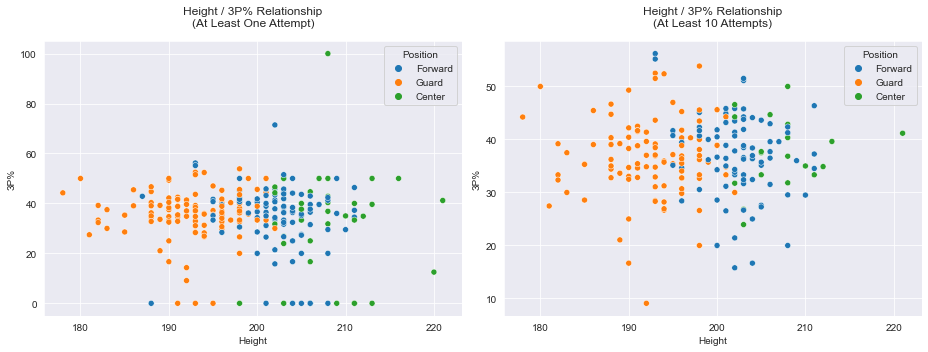

In [109]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.scatterplot(x='Height', y='3P%', data=df[df['3PA'] != 0], hue='Position', ax=ax[0])
sns.scatterplot(x='Height', y='3P%', data=df[df['3PA'] >= 10], hue='Position', ax=ax[1])

ax[0].set_title('Height / 3P% Relationship\n(At Least One Attempt)', pad=15)
ax[1].set_title('Height / 3P% Relationship\n(At Least 10 Attempts)', pad=15)

fig.tight_layout();

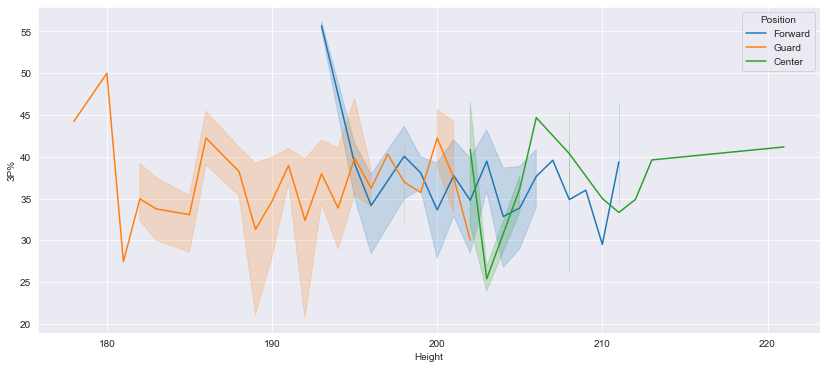

In [110]:
# at least 10 attempts

plt.figure(figsize=(14,6))

sns.lineplot(data=df[df['3PA'] >= 10], x='Height', y='3P%', hue='Position');

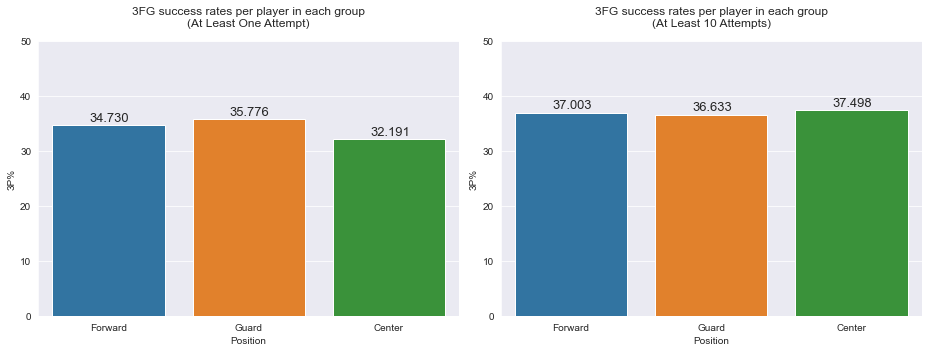

In [111]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

sns.barplot(x="Position", y="3P%", data=df[df['3PA'] != 0], ax = ax[0], ci=None)
sns.barplot(x="Position", y="3P%", data=df[df['3PA'] >= 10], ax = ax[1], ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('3FG success rates per player in each group\n(At Least One Attempt)', pad=15)
ax[1].set_title('3FG success rates per player in each group\n(At Least 10 Attempts)', pad=15)

ax[0].set_ylim(0,50), ax[1].set_ylim(0,50)
fig.tight_layout();

In [112]:
df[(df['3PA'] >= 10) & (df.Position == 'Center')]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
26,"Booker, Devin",Khimki Moscow Region,Center,USA,29,205,15,415,196,6,16,37.500,0.039,200-210
48,"Davis, Brandon",FC Barcelona,Center,USA,29,208,35,749,419,6,14,42.857,0.019,200-210
55,"Diop, Ilimane",Baskonia Vitoria-Gasteiz,Center,Spain,25,211,27,182,36,5,15,33.333,0.082,211-223
61,"Dubljevic, Bojan",Valencia Basket,Center,Montenegro,29,205,29,652,285,26,78,33.333,0.120,200-210
80,"Garuba, Usman",Real Madrid,Center,Spain,18,203,39,636,153,11,41,26.829,0.064,200-210
117,"Jerebko, Jonas",Khimki Moscow Region,Center,Sweden,33,208,15,393,173,23,57,40.351,0.145,200-210
140,"Lammers, Ben",Alba Berlin,Center,USA,25,208,28,580,279,7,19,36.842,0.033,200-210
146,"Leday, Zach",AX Armani Exchange Milan,Center,USA,26,202,36,889,360,34,73,46.575,0.082,200-210
166,"Mickey, Jordan",Khimki Moscow Region,Center,USA,26,203,28,809,438,17,71,23.944,0.088,200-210
184,"Noua, Amine",LDLC ASVEL Villeurbanne,Center,France,23,202,28,435,140,20,63,31.746,0.145,200-210


<span style="color:purple"><b>When we removed 0-Attempts, success rates get closer to each other. In the second condition, the last group has the highest success rate. But the last group also has the fewest players and their 3-points attempts are less than the 3-point attempts of Guards and Forwards.</b></span>

In [113]:
df[df['3PA'] >= 10].groupby('Position').size()

Position
Center      19
Forward     81
Guard      105
dtype: int64

<div class="alert alert-block alert-warning">

<b>Outliers (At Least 10 Attempts)</b>
    
</div>

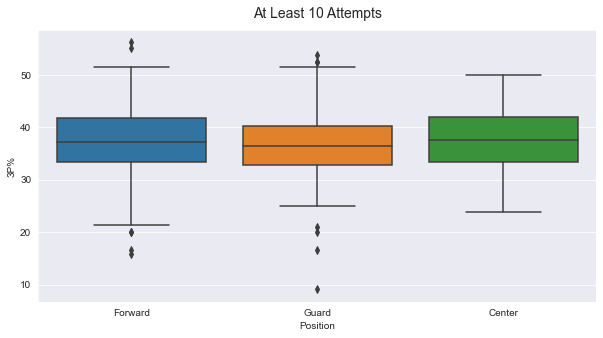

In [114]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Position', y='3P%', data=df[(df['3PA'] >= 10)])
plt.title('At Least 10 Attempts',fontdict={'fontsize': 14}, pad=12);

In [115]:
df[(df['3PA'] >= 10) & (df['3P%'] >= 50)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
46,"Datome, Luigi",AX Armani Exchange Milan,Forward,Italy,33,203,37,611,261,46,90,51.111,0.147,200-210
56,"Diot, Antoine",LDLC ASVEL Villeurbanne,Guard,France,31,193,30,563,178,42,80,52.500,0.142,189-199
109,"Howard, William",LDLC ASVEL Villeurbanne,Forward,France,27,203,22,393,187,34,66,51.515,0.168,200-210
121,"Jovic, Stefan",Khimki Moscow Region,Guard,Serbia,30,198,8,185,35,7,13,53.846,0.070,189-199
135,"Kuric, Kyle",FC Barcelona,Forward,Slovakia,31,193,39,735,339,68,121,56.198,0.165,189-199
147,"Lekavicius, Lukas",Zalgiris Kaunas,Guard,Lithuania,26,180,33,606,271,25,50,50.000,0.083,178-188
175,"Moraschini, Riccardo",AX Armani Exchange Milan,Guard,Italy,29,194,24,265,75,11,21,52.381,0.079,189-199
189,"Oriola, Pierre",FC Barcelona,Center,Spain,28,208,38,571,204,5,10,50.000,0.018,200-210
230,"Seeley, Dennis",FC Bayern Munich,Guard,USA,31,193,27,550,219,34,66,51.515,0.120,189-199
270,"Vialtsev, Egor",Khimki Moscow Region,Forward,Russian Federation,35,193,17,258,70,16,29,55.172,0.112,189-199


In [116]:
df[(df['3PA'] >= 10) & (df['3P%'] <= 20)]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3PM,3PA,3P%,3PA/Min,Height_Group
38,"Charalampopoulos, Vasilis",Olympiacos Piraeus,Forward,Greece,23,202,11,83,28,3,19,15.789,0.229,200-210
40,"Claver, Victor",FC Barcelona,Forward,Spain,32,208,15,190,34,3,15,20.000,0.079,200-210
88,"Gist, James",FC Bayern Munich,Forward,USA,34,204,23,497,128,2,12,16.667,0.024,200-210
129,"Khvostov, Dmitry",Zenit St Petersburg,Guard,Russian Federation,31,190,18,118,18,2,12,16.667,0.102,189-199
139,"Lacombe, Paul",LDLC ASVEL Villeurbanne,Guard,France,30,198,25,284,59,3,15,20.000,0.053,189-199
200,"Ponkrashov, Anton",Khimki Moscow Region,Forward,Russian Federation,34,200,9,156,22,4,20,20.000,0.128,200-210
288,"Zakharov, Denis",Zenit St Petersburg,Guard,Russian Federation,27,192,17,82,15,1,11,9.091,0.134,189-199


***

<div class="alert alert-block alert-danger">
    
<b>RESULTS</b>
    
</div>

**1.**  There is a negative relationship (correlation) between Height and 3FG Attempts.

**2.**  As height increases, so does the number of players who have never attempted a three-pointer.

**3.**  Although the number of players in the first height group is almost the same as in the last height group, there is an obvious difference in 3-point attempts. Because shorter players have more opportunities for 3-point attempts (they are good ball handler, usually very fast and good at driving, more athletic/energetic, mostly play away from the basket, etc.) so they are more prone to shooting.

**4.** Although the average game duration (per player) of the groups is close, 3FG attempts decrease according to the order of the groups.

**5.** When analyzing 3-pointers, we cannot ignore the positions assigned to the players. However, we can see a negative relationship (even it is not strong) between height and 3-point attempts even in each position.

**6.** The centers use their size to play the short-range game. Since they play "in the paint" (close to the basket), it is extremely rare to see one who can execute a three-point shot. But we know that some positions are used interchangeably, so we can see some power forwards play in the Center position. Even in this case, we see that they do not give up trying to shoot 3-pointers.

**7.**  3P% (success rates) are close to each other (when excluding 0 attempts). But the average number of 3-point attempts and the number of the groups are not same.

        
**Three-pointers are used more than ever in modern basketball, and it will be a huge advantage for clubs to have tall players who expand their shooting range to three-pointers.**